# E-commerce Churn Analysis & Modeling.
### - Mục tiêu của dự án này là giải quyết bài toán tỷ lệ khách hàng rời bỏ trên nền tảng thương mại điện tử để hiểu lý do tại sao khách hàng rời bỏ.
### - Huấn luyện mô hình Machine Learning để xác định các yếu tố chính ảnh hưởng đến tỷ lệ khách hàng rời bỏ.
# Tổng quan Dự án:
1. **Nhập Thư viện & Tập Dữ liệu**
   
2. **Xử lý Dữ liệu**
   - *Dọn dẹp Dữ liệu*
   - *Xử lý Giá trị Thiếu*
   - *Xử lý Sự không nhất quán*

3. **Phân tích Dữ liệu Khám Phá (EDA)**
   - *Hình dung Biến Phụ thuộc*
   - *Hình dung Biến Độc lập*
   - *Feature Engineering*

4. **Tiền xử lý Dữ liệu**
   - *Lựa chọn và Đánh giá Biến*
   - *Biến đổi, Chuẩn hóa và Mã hóa Đặc trưng*
   - *Chia Dữ liệu cho Huấn luyện Mô hình*
   - *Áp dụng SMOTE để giảm thiểu sự mất cân bằng lớp*

5. **Tạo, Huấn luyện và Đánh giá Mô hình**
   - *Lựa chọn Thuật toán Phân loại*
   - *Huấn luyện và Tinh chỉnh Mô hình*
   - *Đánh giá và Hiệu suất Mô hình*
   - *Phân tích Confused Matrix*
   - *Độ chính xác, Độ tinh khiết, Độ nhạy và Điểm F1*
   - *Đường cong Nhận diện Hoạt động (ROC) và AUC*
   - *Đánh giá và Đóng góp của Đặc trưng*

**Link Dataset: https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis?select=ecommerce_customer_data_large.csv**

## **IMPORTING LIBRARIES**

In [1]:
import numpy as np  # Tính toán số học
import pandas as pd  # Xử lý dữ liệu
import seaborn as sns  # Trực quan hóa dữ liệu
import matplotlib.pyplot as plt  # Vẽ biểu đồ
import plotly.express as px
from scipy import stats  # Thống kê
import warnings  # Quản lý cảnh báo
warnings.filterwarnings("ignore")  # Ẩn cảnh báo
sns.set(style="darkgrid", font_scale=1.5)  # Thiết lập kiểu seaborn

from sklearn.tree import DecisionTreeClassifier  # Cây quyết định
from sklearn.ensemble import RandomForestClassifier  # Rừng ngẫu nhiên

from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Mã hóa nhãn
from sklearn.model_selection import train_test_split, GridSearchCV  # Chia dữ liệu và tìm tham số
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Đánh giá mô hình
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score  # Ma trận nhầm lẫn và ROC

from imblearn.over_sampling import SMOTE  # Tạo mẫu cho lớp thiểu số

## **LOADING DATASET**

In [18]:
df = pd.read_csv("E commerce.csv")

In [19]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


## **FUNDAMENTAL KNOWLEDGE OF DATA**

### **1. Kiểm tra kích cỡ tập dữ liệu**

In [ ]:
#Kiểm tra kích thước (bao nhiêu dòng, cột)
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 5630
Total number of attributes/columns present in the dataset is: 20


**-> Bộ dữ liệu bao gồm 5,630 bản ghi/dòng và có 20 thuộc tính/cột**

### **2. Tìm nạp tên thuộc tính (các cột)**

In [ ]:
#gọi ra tất cả tên của cột (tiêu đề)
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

 **Phân tích chi tiết bộ dữ liệu**

1. CustomerID: ID duy nhất định danh khách hàng.

2. Churn: Trạng thái rời bỏ của khách hàng.

3. Tenure: Thời gian khách hàng gắn bó với tổ chức.

4. PreferredLoginDevice: Thiết bị khách hàng thường xuyên sử dụng để đăng nhập.

5. CityTier: Phân loại thành phố nơi khách hàng sống theo cấp độ (ví dụ: 1 là thành phố lớn, 3 là nhỏ hơn).

6. WarehouseToHome: Khoảng cách từ kho hàng đến nhà khách hàng.

7. PreferredPaymentMode: Phương thức thanh toán yêu thích của khách hàng.

8. Gender: Giới tính của khách hàng.

9. HourSpendOnApp: Số giờ khách hàng dành trên ứng dụng di động hoặc trang web.

10. NumberOfDeviceRegistered: Tổng số thiết bị đã được đăng ký bởi khách hàng.

11. PreferedOrderCat: Loại sản phẩm khách hàng ưa thích trong tháng trước.

12. SatisfactionScore: Điểm hài lòng của khách hàng về dịch vụ.

13. MaritalStatus: Tình trạng hôn nhân của khách hàng.

14. NumberOfAddress: Tổng số địa chỉ được thêm vào tài khoản của khách hàng.

15. Complain: Có khiếu nại nào được gửi trong tháng trước không (1 là có, 0 là không).

16. OrderAmountHikeFromlastYear: Tỷ lệ tăng giá trị đơn hàng so với năm trước (%).

17. CouponUsed: Tổng số phiếu giảm giá đã sử dụng trong tháng trước.

18. OrderCount: Tổng số đơn hàng đã đặt trong tháng trước.

19. DaySinceLastOrder: Số ngày kể từ đơn hàng cuối cùng của khách hàng.

20. CashbackAmount: Số tiền hoàn lại trung bình trong tháng trước.


### **3. Tạo thông tin cơ bản cho dữ liệu**

In [ ]:
# Tìm hiểu thông tin của các kiểu dữ liệu (số, chữ, có null không?)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

DataFrame có 5,630 bản ghi và 20 cột. Các loại dữ liệu bao gồm:
- int64 (8 cột): Chứa các thông tin số nguyên như CustomerId, CityTier, NumberOfDeviceRegistered , SatisfactionScore, NumberOfAddress, Complain, CashbackAmount và Churn.
- float64 (7 cột): Đại diện cho các giá trị số thực, ở đây là Tenure, WarehouseToHome,  HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder.
- object (5 cột): Gồm PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat và MaritalStatus là các biến phân loại.

* Các cột có chứa giá trị null là Tenture, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder.
  
* **Dựa vào kết quả, ở bước tiếp theo ta xử lý null, missing values và Data Imputation cho cột chứa null**

### **4. Xử lí null, missing values và Data imputation**

**1. Tenure**

In [ ]:
null_percentage = df['Tenure'].isnull().mean() * 100
print(f"Tỷ lệ giá trị null trong cột Tenure: {null_percentage:.2f}%")

Tỷ lệ giá trị null trong cột Tenure: 4.69%


In [ ]:
df[df.Tenure.isnull()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,52757,0,NaN,Phone,2,8.0,UPI,Female,2.0,3,Mobile,4,Married,5,0,14.0,0.0,1.0,2.0,122
2760,52761,0,NaN,Computer,1,7.0,CC,Male,2.0,4,Mobile,3,Married,2,0,12.0,0.0,1.0,0.0,120
2773,52774,0,NaN,Phone,3,7.0,CC,Male,3.0,4,Mobile,4,Married,1,0,14.0,2.0,2.0,2.0,123
2783,52784,1,NaN,Computer,3,15.0,E wallet,Male,2.0,3,Mobile Phone,5,Married,2,0,19.0,1.0,1.0,0.0,118


In [ ]:
df[df.Tenure.isnull()]['Churn'].value_counts()

,count
Churn,
0,183
1,81


* Dựa trên kết quả phân tích, cột Tenure có tỷ lệ giá trị null là 4,69%, một tỷ lệ thấp và có thể xử lý mà không ảnh hưởng lớn đến dữ liệu tổng thể. Sau khi kiểm tra các dòng có giá trị null trong cột này, không phát hiện được mối liên kết đáng kể giữa giá trị null và các yếu tố khác. Đặc biệt, khi xem xét phân phối giá trị null so với cột Churn, kết quả cho thấy Churn = 0 có 183 giá trị null và Churn = 1 có 81 giá trị null, điều này không cho thấy bất kỳ quy luật hay ý nghĩa đặc biệt nào.

* Do đó, phương pháp xử lý được lựa chọn là thay thế các giá trị null bằng trung vị. Trung vị được ưu tiên trong trường hợp này vì nó ít bị ảnh hưởng bởi các giá trị ngoại lai và phản ánh tốt hơn sự phân phối của cột Tenure. Việc thay thế giá trị null bằng trung vị giúp giữ lại tất cả các dòng dữ liệu, tránh mất thông tin và đảm bảo tính toàn vẹn của tập dữ liệu khi xây dựng mô hình dự đoán.

In [20]:
median_tenure = df['Tenure'].median()
df['Tenure'].fillna(median_tenure, inplace=True)

In [ ]:
print(df['Tenure'].isnull().sum())

0


**4.2. WarehouseToHome**

In [ ]:
null_percentage = df['WarehouseToHome'].isnull().mean() * 100
print(f"Tỷ lệ giá trị null trong cột WarehouseToHome: {null_percentage:.2f}%")

Tỷ lệ giá trị null trong cột WarehouseToHome: 4.46%


In [ ]:
pd.set_option('display.max_rows',20)
df[df.WarehouseToHome.isnull()].sample(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2153,52154,0,2.0,Phone,1,NaN,Debit Card,Female,3.0,3,Mobile,1,Married,5,0,22.0,1.0,1.0,7.0,125
2187,52188,1,0.0,Phone,1,NaN,Debit Card,Female,3.0,3,Mobile,1,Married,2,1,11.0,1.0,1.0,0.0,125
1574,51575,1,0.0,Phone,1,NaN,CC,Male,2.0,4,Mobile,1,Single,2,1,13.0,0.0,1.0,1.0,124
2634,52635,0,11.0,Computer,2,NaN,UPI,Male,3.0,3,Mobile,4,Married,6,0,13.0,2.0,3.0,8.0,126
96,50097,0,6.0,Phone,1,NaN,CC,Female,2.0,4,Mobile,4,Divorced,7,0,21.0,0.0,1.0,1.0,126
1733,51734,0,15.0,Phone,1,NaN,Debit Card,Female,3.0,3,Mobile,5,Married,4,0,16.0,0.0,1.0,2.0,126
1989,51990,0,4.0,Phone,1,NaN,Debit Card,Male,2.0,3,Mobile,1,Married,4,1,19.0,0.0,1.0,2.0,124
301,50302,0,3.0,Computer,1,NaN,CC,Female,2.0,3,Mobile,2,Single,1,0,14.0,5.0,6.0,7.0,126
51,50052,0,6.0,Phone,1,NaN,Debit Card,Male,2.0,3,Mobile,2,Single,1,0,14.0,0.0,1.0,2.0,125
1895,51896,0,0.0,Phone,1,NaN,CC,Male,2.0,3,Mobile,5,Married,2,0,14.0,1.0,1.0,2.0,125


In [ ]:
df[df.WarehouseToHome.isnull()]['Churn'].value_counts()

,count
Churn,
0,167
1,84


* Tương tự Tenture, cột WarehouseToHome có tỷ lệ giá trị null là 4,46%, nằm trong ngưỡng thấp và có thể xử lý mà không gây ảnh hưởng đáng kể đến dữ liệu tổng thể. Sau khi kiểm tra các dòng có giá trị null trong cột này, không phát hiện mối liên kết rõ ràng giữa giá trị null và các yếu tố khác. Khi so sánh phân phối giá trị null với cột Churn, kết quả cho thấy:

* Churn = 0 có 167 giá trị null.
* Churn = 1 có 84 giá trị null.

Phân bố này không cho thấy bất kỳ quy luật hay ý nghĩa đặc biệt nào liên quan đến việc khách hàng có rời bỏ hay không. Do đó null WarehouseToHome cũng sẽ được thay thế bằng giá trị trung bình

In [21]:
median_distance = df['WarehouseToHome'].median()
df['WarehouseToHome'].fillna(median_distance, inplace=True)

In [ ]:
print(df['WarehouseToHome'].isnull().sum())

0


**4.3. HourSpendOnApp**

In [ ]:
null_percentage = df['HourSpendOnApp'].isnull().mean() * 100
print(f"Tỷ lệ giá trị null trong cột HourSpendOnApp: {null_percentage:.2f}%")

Tỷ lệ giá trị null trong cột HourSpendOnApp: 4.53%


In [ ]:
pd.set_option('display.max_rows',20)
df[df.HourSpendOnApp.isnull()].sample(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2682,52683,0,1.0,Phone,3,9.0,CC,Female,NaN,3,Mobile,4,Married,2,0,19.0,1.0,1.0,0.0,129
422,50423,1,5.0,Computer,1,25.0,CC,Male,NaN,2,Mobile,3,Married,7,1,12.0,2.0,2.0,2.0,128
1824,51825,1,0.0,Computer,1,13.0,Debit Card,Female,NaN,3,Mobile,3,Married,2,1,16.0,0.0,1.0,2.0,129
349,50350,0,0.0,Phone,1,29.0,CC,Male,NaN,2,Mobile,2,Divorced,2,1,11.0,0.0,1.0,4.0,127
1819,51820,0,0.0,Phone,1,29.0,CC,Male,NaN,1,Mobile,1,Married,2,1,11.0,0.0,1.0,4.0,127
2736,52737,0,11.0,Phone,3,7.0,Debit Card,Male,NaN,4,Mobile,5,Single,5,0,14.0,1.0,1.0,0.0,129
2012,52013,1,4.0,Phone,1,8.0,Debit Card,Female,NaN,5,Mobile,1,Married,5,1,13.0,0.0,1.0,0.0,128
161,50162,1,7.0,Computer,1,30.0,Debit Card,Male,NaN,3,Mobile,3,Married,4,1,22.0,0.0,1.0,0.0,132
564,50565,1,0.0,Phone,1,10.0,COD,Male,NaN,3,Mobile,5,Single,2,0,19.0,1.0,1.0,0.0,130
462,50463,0,25.0,Phone,1,17.0,Debit Card,Female,NaN,3,Laptop & Accessory,3,Divorced,9,0,20.0,1.0,1.0,4.0,131


In [ ]:
df[df.HourSpendOnApp.isnull()]['Churn'].value_counts()

,count
Churn,
0,197
1,58


**-> HourSpendOnApp cũng sẽ được xử lý null bằng cách thay thế giá trị trung bình**

In [22]:
median_time = df['HourSpendOnApp'].median()
df['HourSpendOnApp'].fillna(median_time, inplace=True)
print(df['HourSpendOnApp'].isnull().sum())

0


**4.4. OrderAmountHikeFromlastYear**

In [ ]:
null_percentage = df['OrderAmountHikeFromlastYear'].isnull().mean() * 100
print(f"Tỷ lệ giá trị null trong cột OrderAmountHikeFromlastYear: {null_percentage:.2f}%")

Tỷ lệ giá trị null trong cột OrderAmountHikeFromlastYear: 4.71%


In [ ]:
df[df.OrderAmountHikeFromlastYear.isnull()].sample(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4560,54561,0,13.0,Computer,1,7.0,Debit Card,Male,3.0,4,Others,3,Married,3,1,NaN,1.0,2.0,7.0,317
3251,53252,0,26.0,Mobile Phone,3,10.0,E wallet,Male,3.0,5,Grocery,5,Divorced,3,0,NaN,2.0,2.0,17.0,294
5067,55068,0,18.0,Mobile Phone,3,12.0,E wallet,Male,3.0,4,Others,4,Married,9,0,NaN,2.0,4.0,11.0,307
3278,53279,0,24.0,Mobile Phone,1,9.0,Credit Card,Male,4.0,4,Grocery,3,Divorced,7,0,NaN,1.0,2.0,4.0,301
5508,55509,0,14.0,Mobile Phone,1,8.0,Debit Card,Male,4.0,4,Grocery,5,Married,4,0,NaN,3.0,12.0,17.0,293
4901,54902,0,1.0,Mobile Phone,3,12.0,E wallet,Male,3.0,4,Others,3,Married,8,0,NaN,1.0,2.0,1.0,308
3745,53746,0,8.0,Computer,1,22.0,Credit Card,Male,4.0,4,Grocery,5,Married,9,0,NaN,3.0,7.0,10.0,295
5491,55492,0,22.0,Mobile Phone,1,17.0,Debit Card,Male,4.0,5,Others,4,Married,6,0,NaN,4.0,13.0,10.0,322
4440,54441,0,27.0,Mobile Phone,1,10.0,Credit Card,Male,3.0,4,Grocery,3,Married,5,1,NaN,2.0,2.0,4.0,301
4486,54487,0,13.0,Computer,1,14.0,Credit Card,Male,3.0,5,Others,1,Married,3,0,NaN,7.0,14.0,4.0,318


In [ ]:
df[df.OrderAmountHikeFromlastYear.isnull()]['Churn'].value_counts()

,count
Churn,
0,251
1,14


-> Cột OrderAmountHikeFromlastYear có tỷ lệ giá trị null là 4,71%. Phân tích chỉ ra rằng các giá trị null tập trung chủ yếu ở nhóm Churn = 0, điều này gợi ý khả năng đây là lỗi xử lý dữ liệu hơn là thông tin có ý nghĩa. Do đó, các giá trị null được thay thế bằng trung bình của cột để đảm bảo tính liên tục của dữ liệu và tránh mất mát thông tin không cần thiết. Phương pháp này giữ nguyên đặc điểm tổng thể của dữ liệu, hỗ trợ các bước phân tích và mô hình hóa tiếp theo.

In [23]:
median_lastyear = df['OrderAmountHikeFromlastYear'].median()
df['OrderAmountHikeFromlastYear'].fillna(median_lastyear, inplace=True)
print(df['OrderAmountHikeFromlastYear'].isnull().sum())

0


**4.5. CouponUsed**

In [ ]:
null_percentage = df['CouponUsed'].isnull().mean() * 100
print(f"Tỷ lệ giá trị null trong cột CouponUsed: {null_percentage:.2f}%")

Tỷ lệ giá trị null trong cột CouponUsed: 4.55%


In [ ]:
df[df.CouponUsed.isnull()].sample(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5341,55342,0,23.0,Mobile Phone,1,13.0,Debit Card,Female,3.0,5,Grocery,3,Married,4,1,20.0,NaN,3.0,13.0,265
918,50919,0,26.0,Mobile Phone,1,8.0,Credit Card,Male,2.0,1,Grocery,4,Single,5,0,12.0,NaN,8.0,8.0,266
1407,51408,0,23.0,Mobile Phone,1,13.0,Credit Card,Female,2.0,4,Others,3,Married,6,1,12.0,NaN,13.0,8.0,287
883,50884,0,27.0,Mobile Phone,1,6.0,Credit Card,Female,2.0,3,Grocery,2,Single,7,0,19.0,NaN,12.0,7.0,273
3433,53434,0,31.0,Mobile Phone,1,9.0,Debit Card,Female,4.0,5,Grocery,2,Single,5,1,14.0,NaN,5.0,4.0,262
3179,53180,0,17.0,Mobile Phone,1,13.0,UPI,Male,3.0,5,Grocery,2,Married,6,1,15.0,NaN,2.0,1.0,291
4861,54862,0,27.0,Mobile Phone,3,9.0,Credit Card,Male,3.0,4,Grocery,3,Married,8,0,14.0,NaN,16.0,3.0,274
3730,53731,0,14.0,Computer,1,15.0,Credit Card,Male,3.0,5,Fashion,4,Married,4,0,12.0,NaN,5.0,9.0,263
1625,51626,0,26.0,Mobile Phone,1,9.0,Credit Card,Male,2.0,3,Grocery,3,Married,4,1,16.0,NaN,1.0,3.0,276
2353,52354,0,27.0,Mobile Phone,1,7.0,Credit Card,Female,2.0,3,Grocery,1,Single,7,0,19.0,NaN,12.0,7.0,273


In [ ]:
df[df.CouponUsed.isnull()]['Churn'].value_counts()

,count
Churn,
0,248
1,8


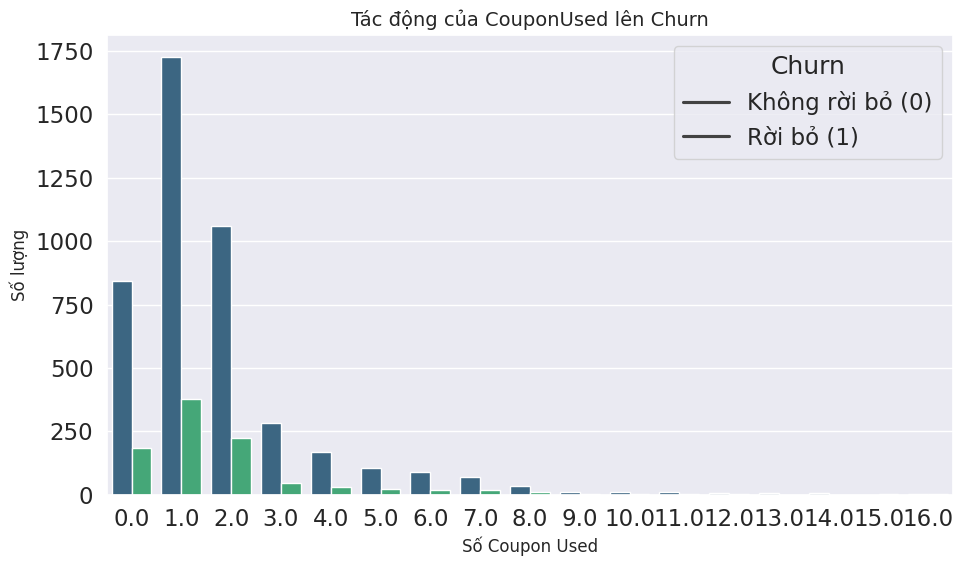

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm dữ liệu theo Churn và CouponUsed, sau đó đếm số lượng
coupon_churn_data = df.groupby(['CouponUsed', 'Churn']).size().reset_index(name='Count')

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=coupon_churn_data, x='CouponUsed', y='Count', hue='Churn', palette='viridis')

# Thêm tiêu đề và nhãn
plt.title('Tác động của CouponUsed lên Churn', fontsize=14)
plt.xlabel('Số Coupon Used', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Churn', labels=['Không rời bỏ (0)', 'Rời bỏ (1)'])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**-> Qua phân tích trên ta sẽ thay thế giá trị null của CouponUsed bằng giá trị phổ biến nhất là 1**

In [24]:
# Tìm giá trị phổ biến nhất (mode) trong cột CouponUsed
mode_coupon = df['CouponUsed'].mode()[0]

# Thay thế các giá trị null bằng giá trị phổ biến (mode)
df['CouponUsed'].fillna(mode_coupon, inplace=True)

# Kiểm tra lại xem đã không còn giá trị null
print(df['CouponUsed'].isnull().sum())

0


**4.6 OrderCount**

In [ ]:
null_percentage = df['OrderCount'].isnull().mean() * 100
print(f"Tỷ lệ giá trị null trong cột OrderCount: {null_percentage:.2f}%")

Tỷ lệ giá trị null trong cột OrderCount: 4.58%


In [ ]:
df[df.OrderCount.isnull()].sample(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4931,54932,0,28.0,Mobile Phone,3,9.0,Debit Card,Female,3.0,5,Fashion,3,Married,8,0,12.0,7.0,NaN,1.0,232
2385,52386,0,13.0,Computer,1,14.0,Credit Card,Male,2.0,4,Fashion,4,Married,3,0,11.0,4.0,NaN,8.0,238
3724,53725,0,19.0,Mobile Phone,1,27.0,Credit Card,Male,4.0,6,Fashion,5,Married,4,1,19.0,1.0,NaN,8.0,234
576,50577,0,26.0,Mobile Phone,3,8.0,Credit Card,Male,2.0,3,Grocery,3,Married,7,0,13.0,2.0,NaN,2.0,249
1423,51424,0,10.0,Mobile Phone,1,13.0,Credit Card,Male,1.0,3,Fashion,3,Single,5,0,13.0,0.0,NaN,2.0,237
502,50503,0,25.0,Computer,1,31.0,Credit Card,Female,2.0,4,Grocery,2,Divorced,4,0,22.0,0.0,NaN,0.0,238
1769,51770,0,30.0,Mobile Phone,3,35.0,E wallet,Male,2.0,4,Grocery,1,Married,4,0,12.0,1.0,NaN,0.0,241
4255,54256,0,28.0,Mobile Phone,1,9.0,Cash on Delivery,Female,3.0,4,Fashion,3,Married,11,0,13.0,1.0,NaN,4.0,260
4947,54948,0,29.0,Computer,1,9.0,Debit Card,Male,4.0,4,Fashion,4,Married,5,0,19.0,1.0,NaN,3.0,235
2320,52321,1,18.0,Mobile Phone,3,19.0,E wallet,Male,2.0,1,Grocery,3,Single,7,1,17.0,1.0,NaN,8.0,237


In [ ]:
df[df.OrderCount.isnull()]['Churn'].value_counts()

,count
Churn,
0,240
1,18


-> Tương tự như OrderAmountHikeFromlastYear, đây cũng có thể là lỗi trong quá trình thu thập dữ liệu, do đó ta có thể thay thế null bằng giá trị trung bình

In [25]:
median_order = df['OrderCount'].median()
df['OrderCount'].fillna(median_order, inplace=True)
print(df['OrderCount'].isnull().sum())

0


**4.7 DaySinceLastOrder**

In [ ]:
null_percentage = df['DaySinceLastOrder'].isnull().mean() * 100
print(f"Tỷ lệ giá trị null trong cột DaySinceLastOrder: {null_percentage:.2f}%")

Tỷ lệ giá trị null trong cột DaySinceLastOrder: 5.45%


In [ ]:
df[df.DaySinceLastOrder.isnull()].sample(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5610,55611,0,9.0,Mobile Phone,2,33.0,Debit Card,Female,3.0,4,Fashion,1,Single,3,1,17.0,2.0,2.0,NaN,213
182,50183,0,11.0,Mobile Phone,1,31.0,Debit Card,Female,2.0,4,Fashion,4,Divorced,4,0,17.0,1.0,1.0,NaN,221
88,50089,0,24.0,Mobile Phone,1,14.0,Debit Card,Male,2.0,4,Fashion,4,Divorced,6,0,16.0,1.0,4.0,NaN,225
4175,54176,0,3.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,2,Fashion,5,Married,3,0,12.0,7.0,9.0,NaN,225
5126,55127,1,21.0,Mobile Phone,1,14.0,Credit Card,Female,3.0,5,Fashion,5,Married,9,1,15.0,2.0,6.0,NaN,225
2081,52082,0,21.0,Mobile Phone,1,10.0,Debit Card,Male,3.0,4,Fashion,3,Single,8,0,14.0,1.0,4.0,NaN,210
3731,53732,0,2.0,Mobile Phone,3,12.0,Credit Card,Male,3.0,4,Laptop & Accessory,5,Single,2,0,19.0,2.0,2.0,NaN,210
3809,53810,0,12.0,Mobile Phone,3,21.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Married,2,0,12.0,6.0,8.0,NaN,224
5079,55080,0,31.0,Mobile Phone,1,25.0,Credit Card,Male,4.0,4,Fashion,1,Single,8,0,13.0,4.0,6.0,NaN,230
4371,54372,0,4.0,Computer,1,7.0,Debit Card,Male,3.0,5,Fashion,3,Single,3,0,23.0,5.0,6.0,NaN,210


In [ ]:
df[df.DaySinceLastOrder.isnull()]['Churn'].value_counts()

,count
Churn,
0,253
1,54


-> Qua kết quả phân tích cho thấy rằng mặc dù tỉ lệ null của DaySinceLastOrder lớn hơn 5% tuy nhiên khi quan sát thì cũng không nhận thấy quy luật đặc biệt nào đối với các biến còn lại. Và DaySinceLastOrder cũng cho thấy rằng đa phần các dữ liệu null đều đem đến kết quả Churn 0, đây có thể là lỗi trong quá trình nhập liệu. Do đó có thể cân nhắc thay thế null bằng giá trị trung bình.

In [26]:
median_lastday = df['DaySinceLastOrder'].median()
df['DaySinceLastOrder'].fillna(median_lastday, inplace=True)
print(df['DaySinceLastOrder'].isnull().sum())

0


In [27]:
# Kiểm tra lại thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**-> Đã xử lý xong các giá trị null**

### **4. Kiểm tra trùng lặp**

In [ ]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


**-> Không có kết quả trùng lặp**

### **5. Thực hiện phân tích thống kê mô tả trên các cột phân loại**

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


**Dựa trên kết quả thống kê mô tả:**

1. **PreferredLoginDevice**: Trong số các giao dịch, có 3 loại thiết bị được ưa thích để đăng nhập, phố biến nhất là Mobile Phone.

2. **PreferedOrderCat**: Các sản phẩm được bán chủ yếu đến từ 6 loại, trong đó các thiết bị liên quan tới máy tính, thiết bị  chiếm ưu thế với 2,050 sản phẩm được bán. Điều này có thể ảnh hưởng đến chiến lược tiếp thị.

3. **PreferredPaymentMode**: Có tới 7 hình thức thanh toán phổ biến, trong đó đa phần là các giao dịch được thanh toán bằng thẻ tín dụng (Debit Card), có vẻ đây là phương thức có nhiều ưu đãi.

4. **MaritalStatus**: Có 3 loại tình trạng hôn nhân của khách hàng, trong đó đa phần mọi người đang ở trong tình trạng đã kết hôn, có vẻ việc lập gia đình đã gia tăng nhu cầu mua sắm, cần có chiến dịch tiếp thị cụ thể cho đối tượng này.

5. **Gender**: Có 2 giới tính, với nam giới chiếm 3,384 khách hàng. Điều này gợi ý rằng các sàn thương mại điện tử cần cân nhắc các sản phẩm phù hợp cho cả hai giới.

#### Đánh giá và nhận xét:
Các thống kê này cho thấy sự đa dạng trong cơ cấu khách hàng, nhưng cũng chỉ ra rằng các sàn thương mại điện tử có thể cần điều chỉnh chiến lược tiếp thị và dịch vụ để phục vụ tốt hơn cho nhu cầu của từng nhóm khách hàng, đặc biệt là trong việc phát triển sản phẩm và dịch vụ phù hợp với giới tính, phân loại sản phẩm cũng như các phương thức thanh toán.

##  **XỬ LÝ DỮ LIỆU**

- Xử lý dữ liệu, hay còn gọi là "data mining", là quá trình làm sạch, chuyển đổi và chuẩn bị dữ liệu thô để phục vụ cho việc phân tích.
- Quá trình này bao gồm việc xử lý các giá trị thiếu, khắc phục những bất nhất và định dạng dữ liệu trước khi nó có thể được sử dụng cho các phân tích tiếp theo.

### **1. Hiển thị Mẫu Ngẫu Nhiên của Dữ liệu**

In [ ]:
df.sample(10)
#Lấy mẫu ngẫu nhiên

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4314,54315,0,6.0,Computer,3,15.0,E wallet,Female,3.0,4,Fashion,1,Single,3,0,15.0,3.0,4.0,3.0,215
3563,53564,0,10.0,Mobile Phone,1,13.0,Debit Card,Male,3.0,6,Mobile Phone,3,Married,3,0,15.0,1.0,2.0,8.0,152
3424,53425,0,1.0,Phone,1,15.0,Debit Card,Male,4.0,6,Mobile Phone,5,Divorced,3,0,16.0,2.0,2.0,2.0,150
5253,55254,0,16.0,Computer,1,9.0,Debit Card,Male,3.0,4,Fashion,1,Married,4,1,15.0,5.0,14.0,3.0,226
3977,53978,0,16.0,Mobile Phone,1,20.0,Credit Card,Male,4.0,2,Laptop & Accessory,5,Married,7,0,19.0,2.0,2.0,1.0,180
3204,53205,1,1.0,Computer,1,10.0,Debit Card,Male,4.0,4,Mobile Phone,5,Single,3,1,12.0,10.0,10.0,8.0,158
3523,53524,0,1.0,Mobile Phone,1,13.0,Debit Card,Male,3.0,5,Mobile Phone,3,Divorced,3,0,14.0,3.0,3.0,3.0,150
3949,53950,0,1.0,Mobile Phone,1,23.0,Debit Card,Male,3.0,2,Laptop & Accessory,3,Married,5,0,17.0,2.0,2.0,8.0,178
3499,53500,0,2.0,Mobile Phone,1,10.0,Credit Card,Female,4.0,4,Fashion,4,Married,2,0,18.0,1.0,2.0,8.0,202
175,50176,0,14.0,Mobile Phone,3,8.0,Debit Card,Male,2.0,3,Grocery,4,Single,2,0,19.0,1.0,2.0,4.0,260


* Cột **CustomerId** thể hiện một giá trị duy nhất cho mỗi khách hàng và dường như không liên quan đến việc dự đoán khách hàng có rời bỏ hay không.

Vì vậy, chúng ta có thể loại bỏ các yếu tố này.

### **2. Loại bỏ các cột không quan trọng**

In [28]:
df.drop(columns=["CustomerID"],inplace=True)

In [ ]:
df.head(1)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160


### **3. Tạo ma trận tương quan và biểu đồ nhiệt**

In [ ]:
print(df.columns)

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [ ]:
# Chuyển đổi kiểu dữ liệu phân loại sang số để phân tích

from sklearn.preprocessing import LabelEncoder

# Sao chép dữ liệu để tránh làm mất thông tin ban đầu
df_encoded = df.copy()

# Danh sách các cột phân loại
categorical_cols = ['PreferredLoginDevice','PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Áp dụng Label Encoding cho tất cả các cột phân loại
lbl = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = lbl.fit_transform(df_encoded[col])
    df_encoded[col] = df_encoded[col].astype(int)  # Chuyển cột về kiểu int sau mã hóa

# Kiểm tra kết quả
print(df_encoded[categorical_cols].dtypes)

PreferredLoginDevice    int64
PreferredPaymentMode    int64
Gender                  int64
PreferedOrderCat        int64
MaritalStatus           int64
dtype: object


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   int64  
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   int64  
 6   Gender                       5630 non-null   int64  
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   int64  
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   int64  
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [ ]:
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,2,1,12.0,0,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
# Ma trận tương quan
correlation_matrix = df_encoded.corr()
correlation_matrix


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.337831,0.013281,0.084703,0.069544,-0.026519,0.029264,0.018816,0.107939,0.118922,0.105481,0.140316,0.043931,0.250188,-0.007075,-0.001430,-0.024038,-0.155871,-0.154161
Tenure,-0.337831,1.000000,-0.083724,-0.057895,-0.012191,0.049345,-0.046389,-0.017282,-0.020657,-0.176302,-0.014452,-0.104786,0.235076,-0.020535,-0.005542,0.101535,0.165339,0.174378,0.468178
PreferredLoginDevice,0.013281,-0.083724,1.000000,-0.074136,-0.033934,-0.078001,0.007272,-0.073197,-0.102246,0.165255,0.051483,-0.003821,-0.055192,0.002670,-0.014576,-0.100116,-0.112166,-0.108847,-0.229518
CityTier,0.084703,-0.057895,-0.074136,1.000000,0.013576,0.233722,-0.025176,-0.009921,0.027934,-0.194898,-0.011554,0.006818,-0.029440,0.003375,-0.028890,0.022629,0.033551,0.010214,0.055698
WarehouseToHome,0.069544,-0.012191,-0.033934,0.013576,1.000000,0.018548,-0.001261,0.064069,0.023020,-0.078911,0.007524,-0.014236,-0.008305,0.026825,0.038311,0.002675,0.000354,0.020253,0.000090
PreferredPaymentMode,-0.026519,0.049345,-0.078001,0.233722,0.018548,1.000000,-0.000493,0.049052,0.069011,-0.091811,-0.015755,-0.024368,0.028773,0.016366,0.020191,0.054554,0.032050,0.053043,0.160593
Gender,0.029264,-0.046389,0.007272,-0.025176,-0.001261,-0.000493,1.000000,-0.017897,-0.021799,0.065843,-0.035220,-0.017370,-0.031492,-0.040269,-0.001702,-0.034740,-0.026933,-0.020152,-0.025245
HourSpendOnApp,0.018816,-0.017282,-0.073197,-0.009921,0.064069,0.049052,-0.017897,1.000000,0.305048,0.098481,0.030937,-0.039810,0.139541,0.006607,0.099305,0.187166,0.102053,0.061213,0.114268
NumberOfDeviceRegistered,0.107939,-0.020657,-0.102246,0.027934,0.023020,0.069011,-0.021799,0.305048,1.000000,0.044399,-0.017228,0.033645,0.084997,0.003407,0.065714,0.152065,0.099790,0.007350,0.137396
PreferedOrderCat,0.118922,-0.176302,0.165255,-0.194898,-0.078911,-0.091811,0.065843,0.098481,0.044399,1.000000,-0.001092,0.043688,-0.069150,-0.004149,0.003440,-0.099453,-0.113288,-0.149104,-0.264277


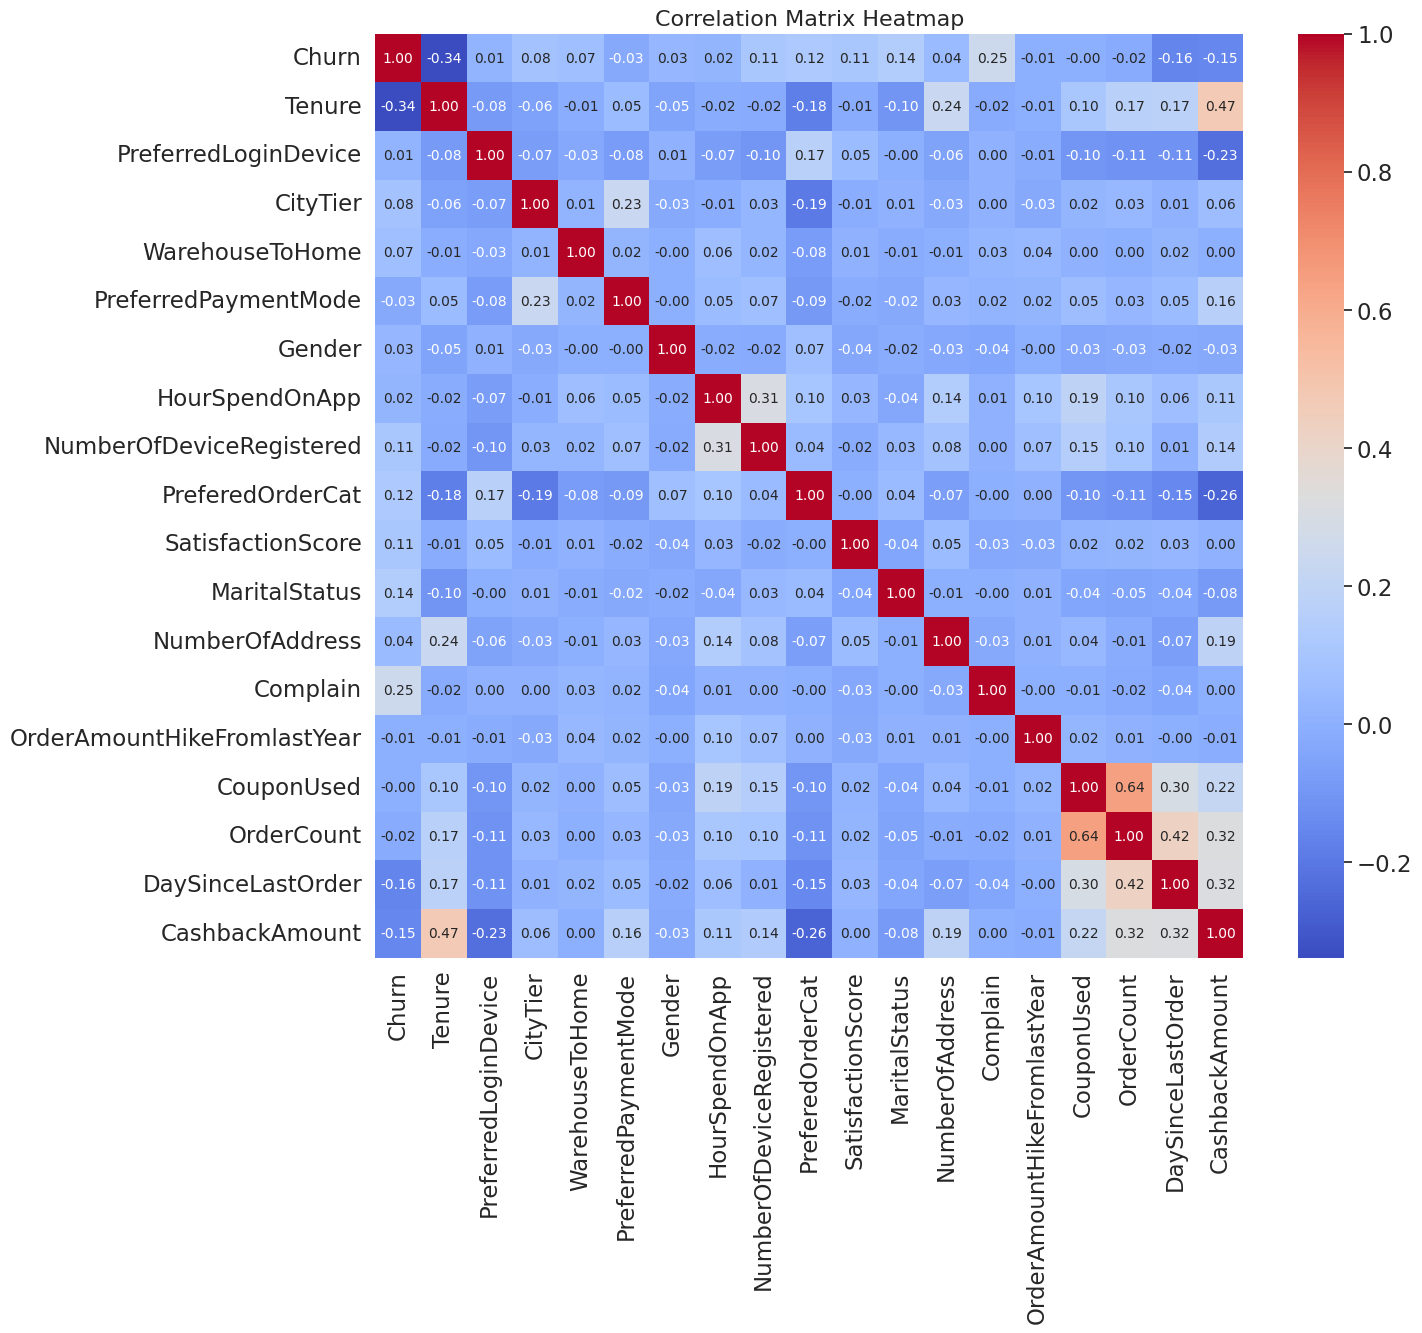

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

Qua biểu đồ nhiệt có thể thấy 4 yếu tố có mối tương quan đáng kể đó là:
* Tenure (-0.34): Mối tương quan tiêu cực cho thấy khách hàng ở lại lâu dài có xu hướng ít rời bỏ hơn. Các khách hàng lâu dài có thể cảm thấy hài lòng hơn và ít có khả năng rời đi.

* Complain (0.25): Mối tương quan tích cực cho thấy khách hàng có khiếu nại có xu hướng rời bỏ nhiều hơn. Việc giải quyết khiếu nại nhanh chóng có thể giảm tỷ lệ rời bỏ.

* DaySinceLastOrder (-0.16): Mối tương quan tiêu cực nhẹ, cho thấy khi thời gian từ lần mua cuối cùng dài ra, khách hàng có xu hướng rời bỏ cao hơn.

* CashbackAmount (-0.15): Mối tương quan tiêu cực nhẹ, chỉ ra rằng khách hàng nhận nhiều tiền hoàn lại có xu hướng ít rời bỏ hơn.

In [ ]:
# Kiểm định thống kê t test cho tất cả các cột

import pandas as pd
from scipy import stats

for col in correlation_matrix.columns:
    t_statistic, p_value = stats.ttest_1samp(correlation_matrix[col], 0)
    print(f"Column: {col}")
    print(f"  T-statistic: {t_statistic}")
    print(f"  P-value: {p_value}")

Column: Churn
  T-statistic: 1.1274497115932758
  P-value: 0.2743578039016746
Column: Tenure
  T-statistic: 1.056283109541734
  P-value: 0.3048104232269685
Column: PreferredLoginDevice
  T-statistic: 0.15443000701601456
  P-value: 0.8789890613236125
Column: CityTier
  T-statistic: 1.0033928735400441
  P-value: 0.32897025968537164
Column: WarehouseToHome
  T-statistic: 1.1328604033053558
  P-value: 0.27213794830569327
Column: PreferredPaymentMode
  T-statistic: 1.5156909061067574
  P-value: 0.14696194029219747
Column: Gender
  T-statistic: 0.7413303142270997
  P-value: 0.4680556360197141
Column: HourSpendOnApp
  T-statistic: 2.08965014143405
  P-value: 0.0511154448907842
Column: NumberOfDeviceRegistered
  T-statistic: 1.967593566884949
  P-value: 0.06471895307951443
Column: PreferedOrderCat
  T-statistic: 0.2582462401553977
  P-value: 0.7991465551188212
Column: SatisfactionScore
  T-statistic: 1.1148627450793218
  P-value: 0.27957373789420537
Column: MaritalStatus
  T-statistic: 0.72928

**-> Có thể thấy, tương quan giữa các yếu tố chỉ ở mức tương đối, ý nghĩa thống kê cũng không đạt yêu cầu, do đó cần có các bước xử lý để củng cố ý nghĩa thống kê như loại bỏ giá trị ngoại lai...**

### **4. KẾT LUẬN**
* Kết quả phân tích dữ liệu cho thấy rằng các yếu tố trong bộ dữ liệu  có mối tương quan không đáng kể với Churn (tỷ lệ rời bỏ). Mặc dù các kiểm định thống kê như t-test cũng không cho thấy sự khác biệt rõ ràng giữa các nhóm khách hàng rời bỏ và không rời bỏ, nhưng không có nghĩa là không thể xây dựng một mô hình dự đoán chính xác.


## **PHÂN TÍCH DỮ LIỆU KHÁM PHÁ (EDA)**

In [29]:
# Đổi giá trị biến mục tiêu cho phù hợp hơn
df["Churn"].replace({0:"No",1:"Yes"},inplace=True) # đổi 1 và 0 thành yes và no
df.tail(10)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,No,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,163
5621,Yes,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,2.0,1.0,234
5622,No,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,2.0,7.0,245
5623,No,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,3.0,224
5624,No,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,No,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,No,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,No,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,No,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,No,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [ ]:
import plotly.graph_objects as go

count = df["Churn"].value_counts()

# Tạo biểu đồ cột cho sự phân bố khách hàng đã rời bỏ
fig = go.Figure()

# Thêm biểu đồ cột
fig.add_trace(go.Bar(
    x=count.index,
    y=count.values,
    marker=dict(color='rgba(102, 194, 165, 0.7)', line=dict(color='rgba(102, 194, 165, 1)', width=2)),
    name='Customer Churned Distribution'
))

# Cập nhật layout cho biểu đồ cột
fig.update_layout(
    title='Customer Churned Distribution',
    xaxis_title='Churned',
    yaxis_title='Count',
    font=dict(size=15, color='black'),
    showlegend=False
)

# Tạo biểu đồ tròn cho sự phân bố khách hàng đã rời bỏ
fig_pie = go.Figure(data=[go.Pie(
    labels=count.index,
    values=count.values,
    textinfo='percent+label',
    marker=dict(colors=px.colors.qualitative.Set2),  # Sửa ở đây
    hole=0.3,
    pull=[0, 0.1]  # Thay đổi kích thước cho phần "No"
)])

# Cập nhật layout cho biểu đồ tròn
fig_pie.update_layout(
    title='Customer Churned Distribution',
    font=dict(size=15, color='black')
)

# Hiển thị cả hai biểu đồ
fig.show()
fig_pie.show()

# In số lượng khách hàng đã rời bỏ và chưa rời bỏ
count_of_churned_yes = count.get("Yes", 0)  # Tránh lỗi KeyError nếu không có "Yes"
count_of_churned_no = count.get("No", 0)    # Tránh lỗi KeyError nếu không có "No"

print(f"Number of churned customers: {count_of_churned_yes}")
print(f"Number of not churned customers: {count_of_churned_no}")

Number of churned customers: 948
Number of not churned customers: 4682


**-> Có sự mất cân bằng lớn giữa các lớp trong dữ liệu, với chỉ 948 khách hàng đã rời bỏ và 4,682 khách hàng không rời bỏ. Điều này có thể dẫn đến thiên lệch trong hiệu suất của mô hình. Để khắc phục tình trạng mất cân bằng này, chúng ta cần áp dụng kỹ thuật tăng cường mẫu (over-sampling).**

### **1. Visualizing Customer Churned by Gender.**

In [ ]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churn",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

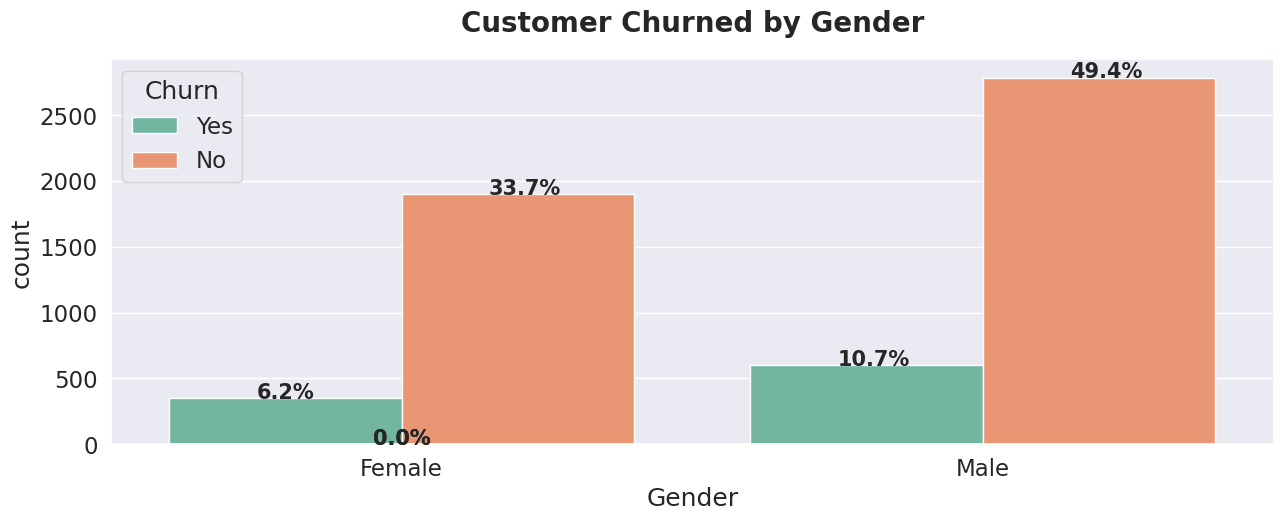

In [ ]:
countplot("Gender")

* **Xác xuất rời bỏ của khách hàng nam và nữ khá chênh lệnh với nhau với tỉ lệ , điều này cho thấy nam giới đang có xu hướng ngừng sử dụng dịch vụ thương mại điện tử hơn so với nữ giới.**

### **2. Visualizing Customer Churned by Product PreferedOrderCat.**

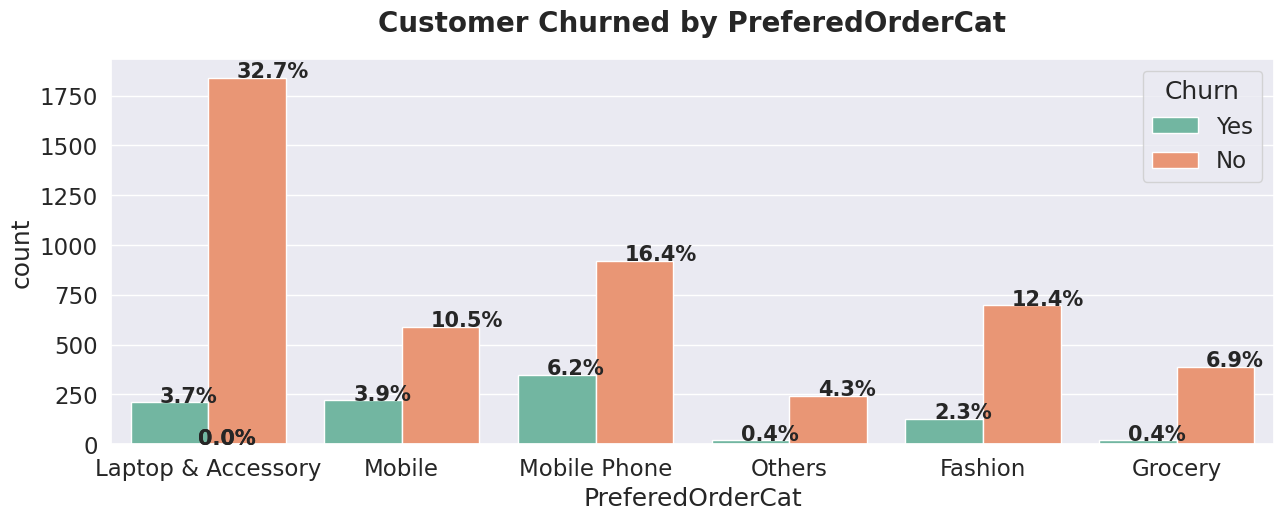

In [ ]:
countplot("PreferedOrderCat")

Tỉ lệ rời bỏ đối với ngành hàng điện thoại di động đang cao nhất với 6.2%, các mặt hàng về thiết bị di động cũng như máy tính như Mobie hay Laptop & Accessory có tỉ lệ rời bỏ lần lượt là 3.7% và 3.9%. Các mặt hàng có tỉ lệ rời bỏ thấp là thời trang cũng như là hàng hóa nhu yếu phẩm.

### **3. Visualizing Customer Churned by PreferredPaymentMode.**

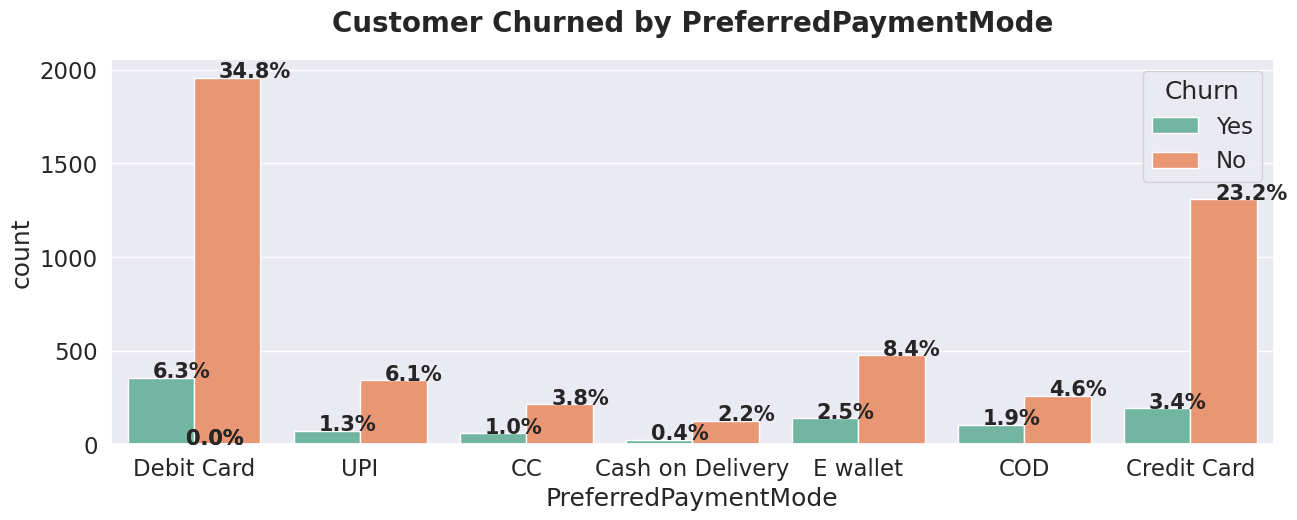

In [ ]:
countplot("PreferredPaymentMode")

Tỉ lệ rời bỏ đối với các hình thức thanh toán bằng thẻ đang có tỉ lệ rời bỏ cao với Debit Card cà Credit Card lần lượt là 6.3% và 3.4%, các phương thức thanh toán có tỉ lệ rời bỏ thấp là tiền mặt cũng như là CC với tỉ lệ dưới 1%.


### **4. Visualizing Customer Churned by PreferredLoginDevices.**

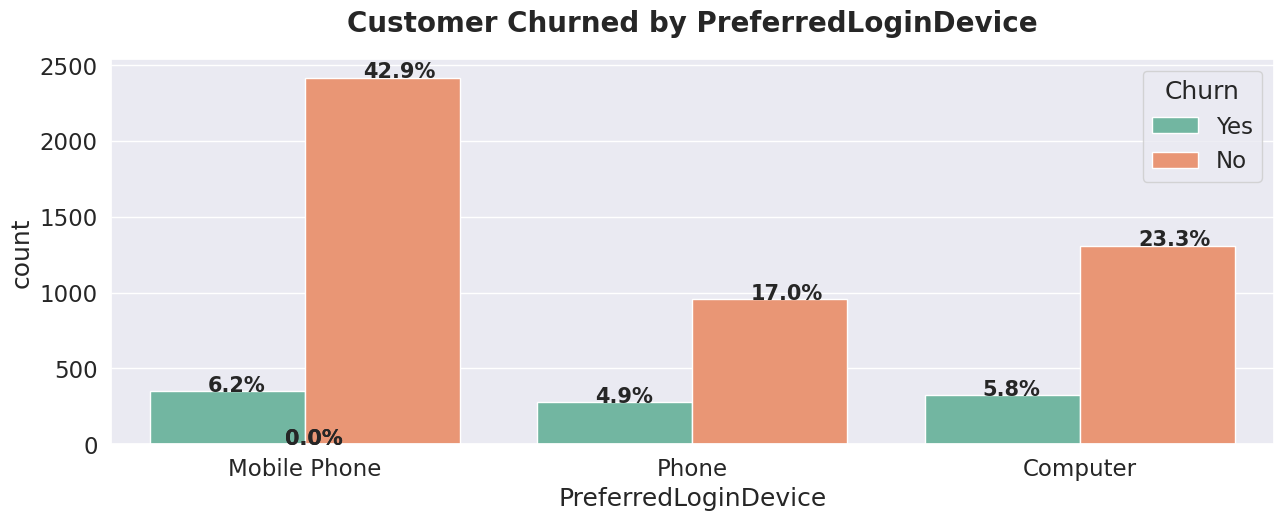

In [ ]:
countplot("PreferredLoginDevice")

Tỉ lệ rời bỏ đối với các thiết bị được sử dụng để đăng nhập vào sàn thương mại điện tử phân bổ khá đồng đều, cao nhất là Mobile Phone với 6.2% tiếp theo là Computer với 5.8%, Phone chiếm 4.9%

In [ ]:
df.head(1)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,Yes,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160


### **5. Visualizing Customer Churned by MaritalStatus.**

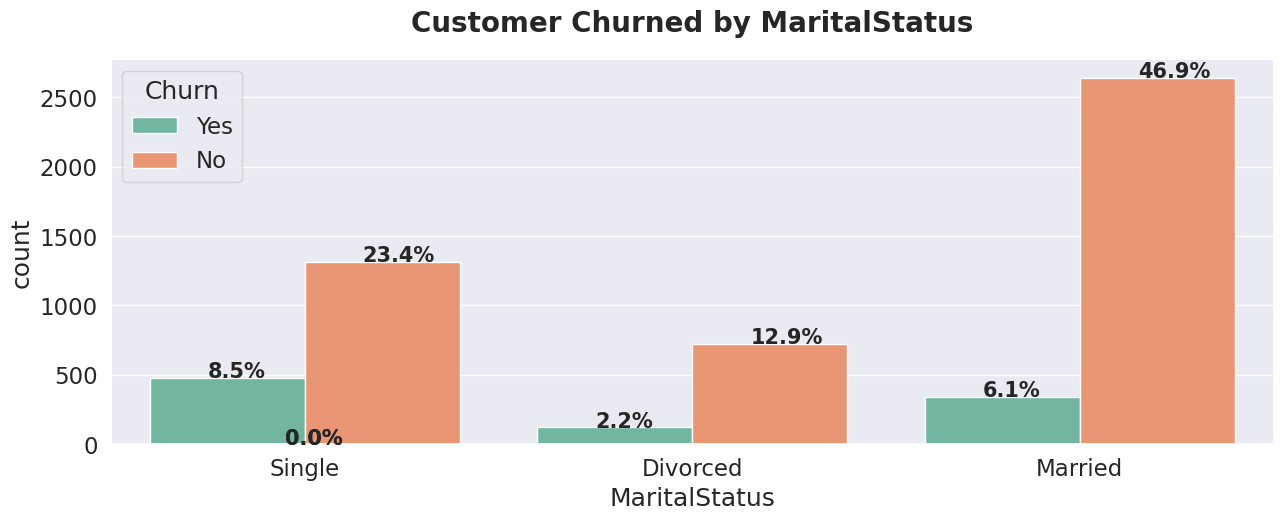

In [ ]:
countplot("MaritalStatus")

Tỉ lệ rời bỏ cao nhất xảy ra ở các khách hàng đang ở tình trạng độc thân với 8%, gấp gần 4 lần tỉ lệ ở những người đã ly hôn. Điều này có thể cho thấy những người độc thân đang có xu hướng rời bỏ thương mại điện tử. Tỉ lệ rời bỏ của những người đã kết hôn tuy cũng cao nhưng so với tổng thể thì cũng không đáng kể.

### **6. Visualizing Customer Churned by "Tenure"**

In [ ]:
df["Churn"] = df["Churn"].astype("category")

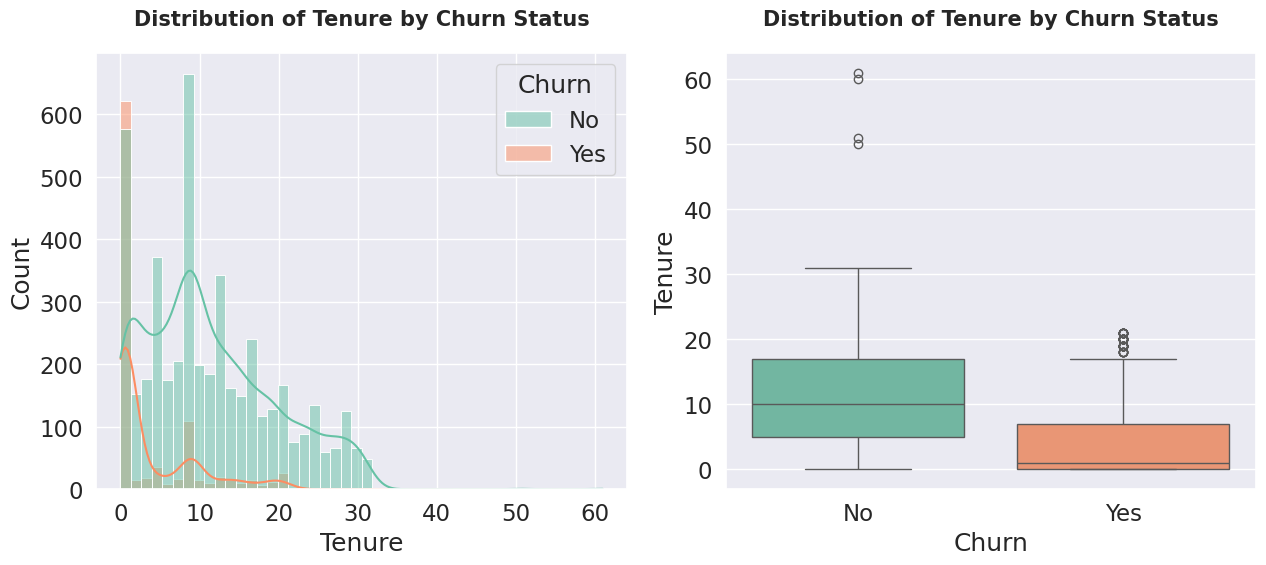

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def continous_plot(column):
    plt.figure(figsize=(13,6))

    plt.subplot(1,2,1)
    sns.histplot(x=column, hue="Churn", data=df, kde=True, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.subplot(1,2,2)
    sns.boxplot(x="Churn", y=column, data=df, palette="Set2") # Corrected line
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.tight_layout()
    plt.show()

continous_plot("Tenure")

Nhìn vào biểu đồ, ta có thể rút ra một số nhận xét sau về mối quan hệ giữa điểm tín dụng (Tenure) và tỉ lệ rời bỏ dịch vụ (Churn Status):

* **Phân bố Tenure**: Nhìn chung, thời gian gắn bó của khách hàng có xu hướng tập trung ở khoảng 5-15. Phân bố này có dạng hơi lệch trái.



### **7. Visualizing Customer Churned by "CityTier"**

In [ ]:
# Tạo biểu đồ cột cho số lượng khách hàng theo số lượng sản phẩm
fig = px.histogram(df, x="CityTier", color="Churn", barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Cập nhật layout cho biểu đồ
fig.update_layout(
    title="Customer Churned by CityTier",
    xaxis_title="CityTier",
    yaxis_title="Count",
    font=dict(size=15, color='black'),
)

# Thêm phần trăm vào mỗi cột
total_count = len(df)  # Tính tổng số khách hàng một lần trước
for i in range(len(fig.data)):
    if fig.data[i].y is not None:  # Kiểm tra xem y có giá trị không
        for j in range(len(fig.data[i].y)):
            percentage = f"{(fig.data[i].y[j] / total_count) * 100:.1f}%"
            fig.add_annotation(
                x=fig.data[i].x[j],
                y=fig.data[i].y[j],
                text=percentage,
                showarrow=True,
                arrowhead=2,
                ax=0,
                ay=-30,
                font=dict(fontweight="black", size=12)
            )

# Hiển thị biểu đồ
fig.show()

**-> Tỉ lệ rời bỏ đang cao nhất ở khách hàng ở đô thị loại 1 và thấp nhất ở các khách hàng đang sinh sống tại đô thị loại 2**

### **8. Visualizing Customer Churned by "WarehouseToHome"**

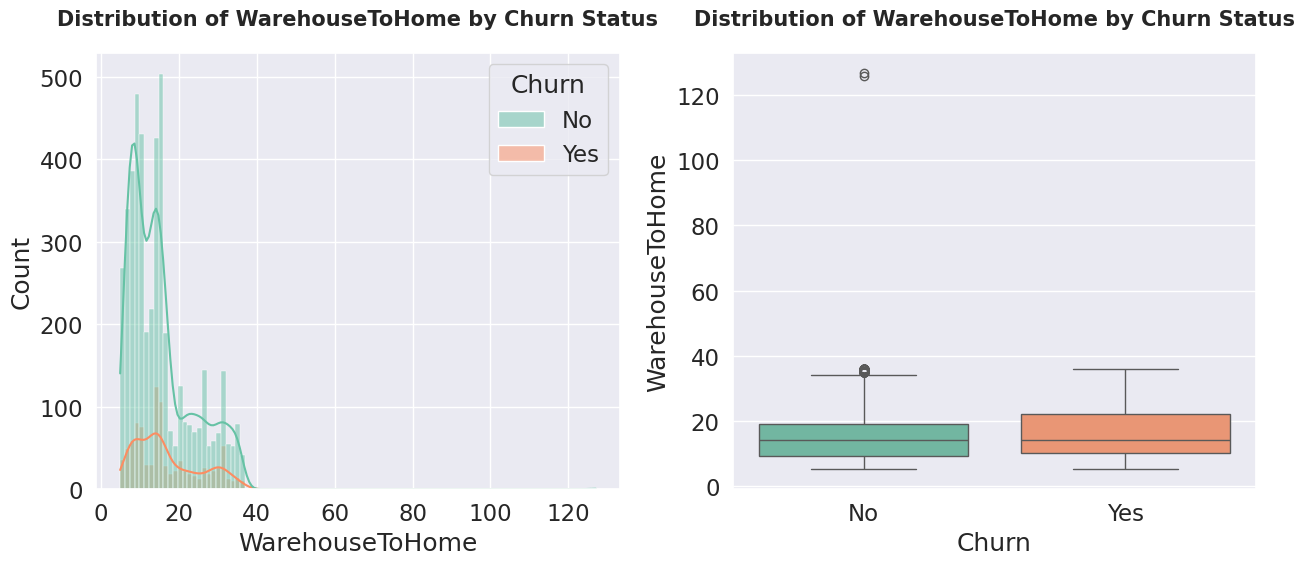

In [ ]:
continous_plot("WarehouseToHome")


* **Phân bố khoảng cách từ nhà đến kho**: Nhìn chung, khoảng cách từ kho hàng đến nhà khách thường tập trung trong khoảng từ 5 đến 20.
* **Mối liên hệ với tỉ lệ rời bỏ**:
    * Nhìn vào biểu đồ hộp (box plot), có vẻ như khách hàng rời bỏ dịch vụ (Churned - Yes) có khoảng cách trung bình tương đương so với khách hàng không rời bỏ (Churned - No).


### **9. Visualizing Customer Churned by "HourSpendOnApp"**

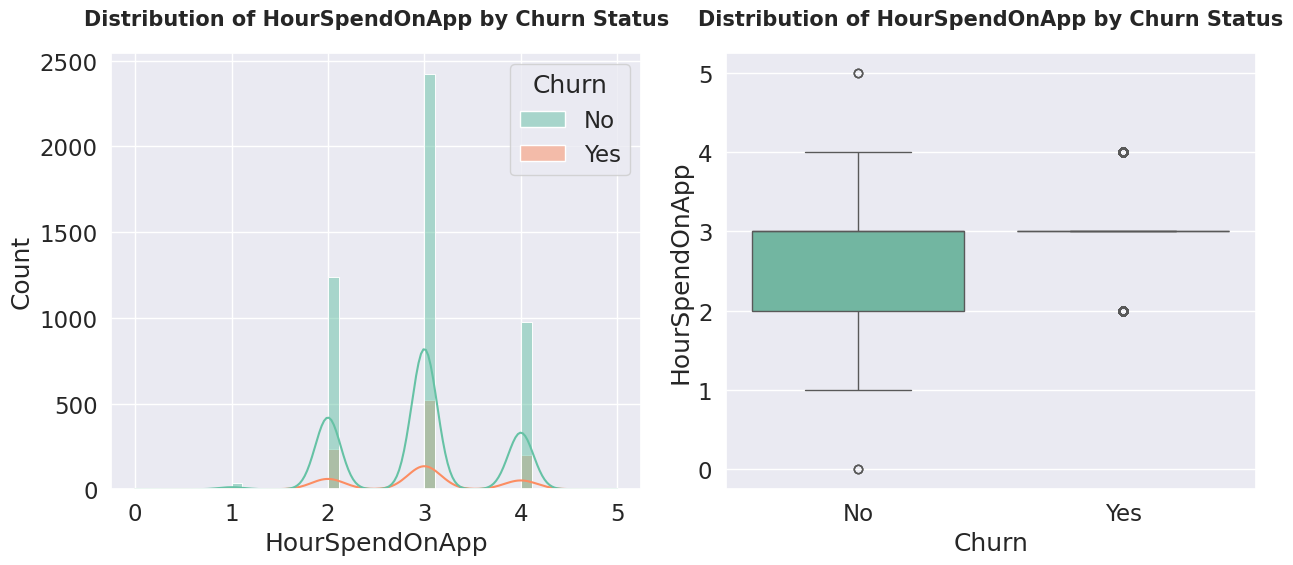

In [ ]:
continous_plot("HourSpendOnApp")

* **Phân bố thời gian sử dụng**: Nhìn chung, trung bình một ngày khách hàng bỏ ra từ 2-4 tiếng trên các sàn thương mại điện tử
* **Mối liên hệ với tỉ lệ rời bỏ**:
    * Nhìn vào biểu đồ hộp (box plot), có vẻ như khách hàng rời bỏ dịch vụ (Churned - Yes) có thời gian sử dụng trung bình lớn hơn so với khách hàng không rời bỏ (Churned - No).

### **10. Visualizing Customer Churned by "NumberOfDeviceRegistered"**

In [ ]:
# Tạo biểu đồ cột cho số lượng khách hàng theo số thiết bị đăng nhập
fig = px.histogram(df, x="NumberOfDeviceRegistered", color="Churn", barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Cập nhật layout cho biểu đồ
fig.update_layout(
    title="Customer Churned by NumberOfDeviceRegistered",
    xaxis_title="NumberOfDeviceRegistered",
    yaxis_title="Count",
    font=dict(size=15, color='black'),
)

# Thêm phần trăm vào mỗi cột
total_count = len(df)  # Tính tổng số khách hàng một lần trước
for i in range(len(fig.data)):
    if fig.data[i].y is not None:  # Kiểm tra xem y có giá trị không
        for j in range(len(fig.data[i].y)):
            percentage = f"{(fig.data[i].y[j] / total_count) * 100:.1f}%"
            fig.add_annotation(
                x=fig.data[i].x[j],
                y=fig.data[i].y[j],
                text=percentage,
                showarrow=True,
                arrowhead=2,
                ax=0,
                ay=-30,
                font=dict(fontweight="black", size=12)
            )

# Hiển thị biểu đồ
fig.show()

Phân bố số thiết bị mà khách hàng đăng ký tập trung ở khoảng 3-5 thiết bị, bên cạnh đó thì tỉ lệ khách hàng rời bỏ ở trong mức này cũng cao hơn so với các giá trị còn lại

### **10. Visualizing Customer Churned by "SatisfactionScore"**

In [ ]:
# Tạo biểu đồ cột cho số lượng khách hàng theo điểm hài lòng
fig = px.histogram(df, x="SatisfactionScore", color="Churn", barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Cập nhật layout cho biểu đồ
fig.update_layout(
    title="Customer Churned by SatisfactionScore",
    xaxis_title="SatisfactionScore",
    yaxis_title="Count",
    font=dict(size=15, color='black'),
)

# Thêm phần trăm vào mỗi cột
total_count = len(df)  # Tính tổng số khách hàng một lần trước
for i in range(len(fig.data)):
    if fig.data[i].y is not None:  # Kiểm tra xem y có giá trị không
        for j in range(len(fig.data[i].y)):
            percentage = f"{(fig.data[i].y[j] / total_count) * 100:.1f}%"
            fig.add_annotation(
                x=fig.data[i].x[j],
                y=fig.data[i].y[j],
                text=percentage,
                showarrow=True,
                arrowhead=2,
                ax=0,
                ay=-30,
                font=dict(fontweight="black", size=12)
            )

# Hiển thị biểu đồ
fig.show()

Qua biểu đồ có thể thấy, hầu hết các khách hàng đều hài lòng ở mức trung bình trên thang điểm là 5, và tỉ lệ rời bỏ của khách hàng cũng tập trung ở mức điểm trên trung bình

### **11. Visualizing Customer Churned by "NumberOfAddress"**

In [ ]:
# Tạo biểu đồ cột cho số lượng khách hàng theo số địa chỉ đăng ký
fig = px.histogram(df, x="NumberOfAddress", color="Churn", barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Cập nhật layout cho biểu đồ
fig.update_layout(
    title="Customer Churned by NumberOfAddress",
    xaxis_title="NumberOfAddress",
    yaxis_title="Count",
    font=dict(size=15, color='black'),
)

# Thêm phần trăm vào mỗi cột
total_count = len(df)  # Tính tổng số khách hàng một lần trước
for i in range(len(fig.data)):
    if fig.data[i].y is not None:  # Kiểm tra xem y có giá trị không
        for j in range(len(fig.data[i].y)):
            percentage = f"{(fig.data[i].y[j] / total_count) * 100:.1f}%"
            fig.add_annotation(
                x=fig.data[i].x[j],
                y=fig.data[i].y[j],
                text=percentage,
                showarrow=True,
                arrowhead=2,
                ax=0,
                ay=-30,
                font=dict(fontweight="black", size=12)
            )

# Hiển thị biểu đồ
fig.show()

Trung bình một khách hàng đăng ký 2 cho đến 4 địa chỉ giao hàng, tỉ lệ rời bỏ cũng tập trung chủ yếu ở khoảng này.

### **12. Visualizing Customer Churned by "CashbackAmount"**

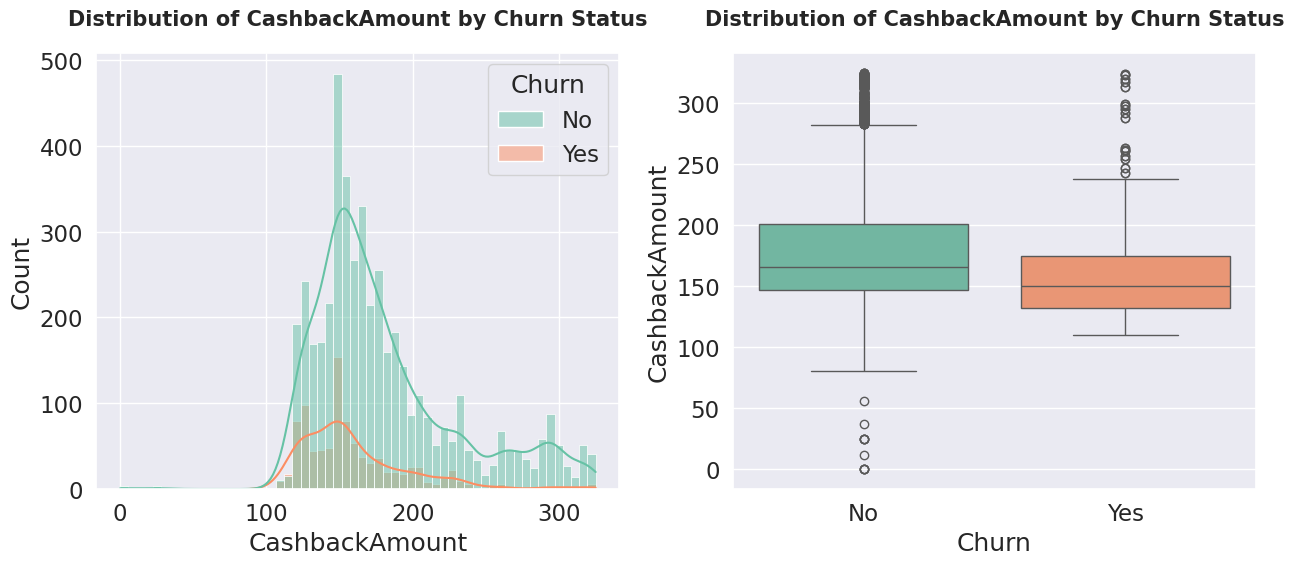

In [ ]:
continous_plot("CashbackAmount")

Qua biểu đồ ta có thể thấy, sự phân bố số tiền được hoàn thường tập trung ở khoảng 100 - 200.

Qua biểu đồ hộp, nhìn chung không có sự khác biệt đáng kể về số tiền được hoàn giữa nhóm khách hàng rời bỏ và nhóm khách hàng không rời bỏ

### **13. Visualizing Customer Churned by "Complain"**

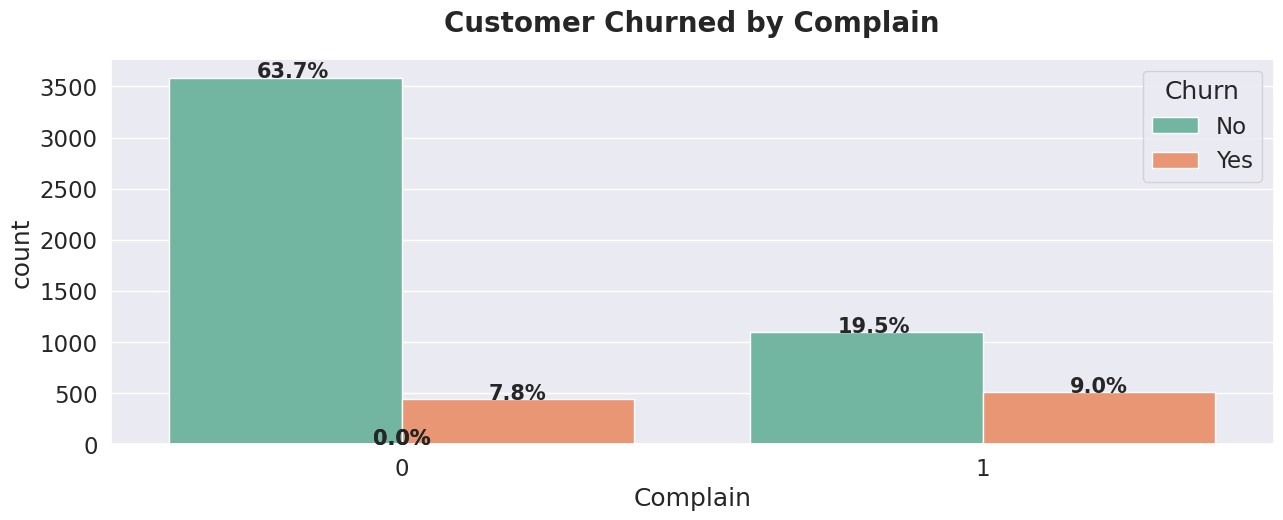

In [ ]:
countplot("Complain")

Qua biểu đồ ta có thể thấy, tỉ lệ rời bỏ của khách hàng cao hơn ở những người có comlain trên sàn TMĐT. Nói cách khác, những người có đánh giá không tốt thường sẽ rời bỏ cao hơn.

### **14. Visualizing Customer Churned by "OrderAmountHikeFromlastYear"**

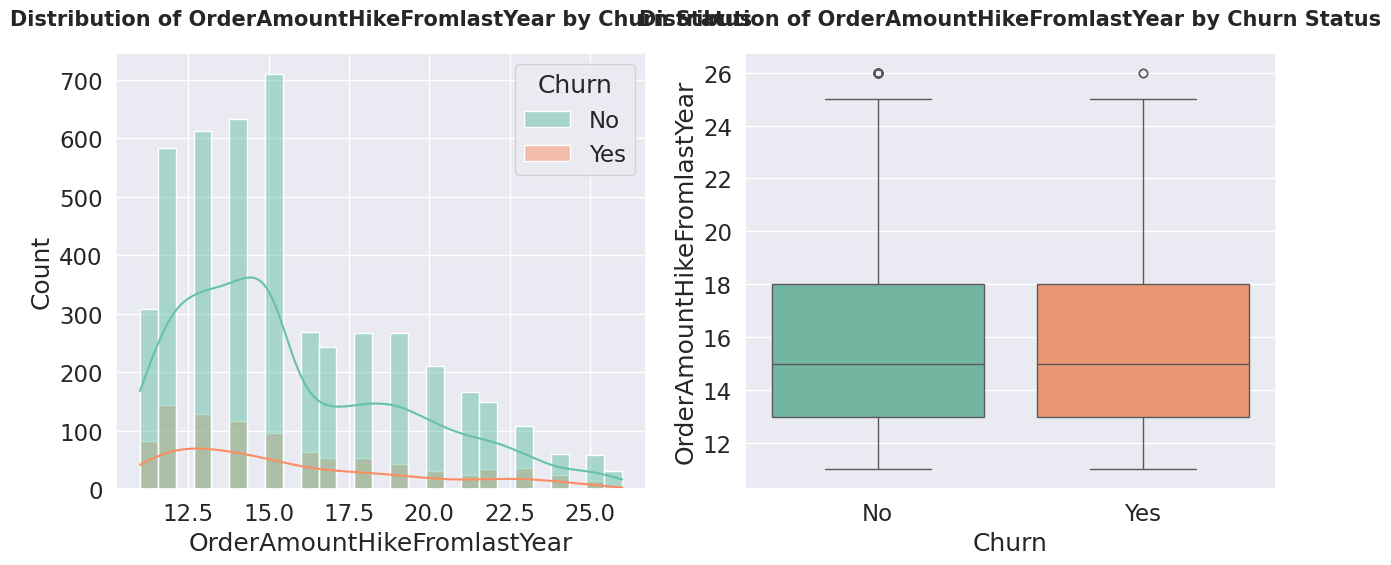

In [ ]:
continous_plot("OrderAmountHikeFromlastYear")

Nhìn chung, doanh thu đặt hàng so với năm trước của khách hàng thường tập trung ở 12.5 - 15%. Và giá trị trung bình giữa hai nhóm khách hàng rời bỏ và không rời bỏ không có gì quá khác biệt.

### **15. Visualizing Customer Churned by "CouponUsed"**

In [ ]:
# Tạo biểu đồ cột cho số lượng khách hàng theo số mã giảm giá sử dụng
fig = px.histogram(df, x="CouponUsed", color="Churn", barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Cập nhật layout cho biểu đồ
fig.update_layout(
    title="Customer Churned by CouponUsed",
    xaxis_title="CouponUsed",
    yaxis_title="Count",
    font=dict(size=15, color='black'),
)

# Thêm phần trăm vào mỗi cột
total_count = len(df)  # Tính tổng số khách hàng một lần trước
for i in range(len(fig.data)):
    if fig.data[i].y is not None:  # Kiểm tra xem y có giá trị không
        for j in range(len(fig.data[i].y)):
            percentage = f"{(fig.data[i].y[j] / total_count) * 100:.1f}%"
            fig.add_annotation(
                x=fig.data[i].x[j],
                y=fig.data[i].y[j],
                text=percentage,
                showarrow=True,
                arrowhead=2,
                ax=0,
                ay=-30,
                font=dict(fontweight="black", size=12)
            )

# Hiển thị biểu đồ
fig.show()

Qua biểu đồ có thể thấy rằng, trung bình một khách hàng đã từng sử dụng từ 1 cho đến 2 Coupon. Và tỉ lệ rời bỏ trong khoảng này cũng là cao nhất. Điều này cho thấy cần có các chiến dịch thích hợp trong tương lai đối với việc sử dụng mã khuyến mãi.

### **16. Visualizing Customer Churned by "OrderCount"**

In [ ]:
# Tạo biểu đồ cột cho số lượng khách hàng theo số đơn hàng đã đặt
fig = px.histogram(df, x="OrderCount", color="Churn", barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Cập nhật layout cho biểu đồ
fig.update_layout(
    title="Customer Churned by OrderCount",
    xaxis_title="OrderCount",
    yaxis_title="Count",
    font=dict(size=15, color='black'),
)

# Thêm phần trăm vào mỗi cột
total_count = len(df)  # Tính tổng số khách hàng một lần trước
for i in range(len(fig.data)):
    if fig.data[i].y is not None:  # Kiểm tra xem y có giá trị không
        for j in range(len(fig.data[i].y)):
            percentage = f"{(fig.data[i].y[j] / total_count) * 100:.1f}%"
            fig.add_annotation(
                x=fig.data[i].x[j],
                y=fig.data[i].y[j],
                text=percentage,
                showarrow=True,
                arrowhead=2,
                ax=0,
                ay=-30,
                font=dict(fontweight="black", size=12)
            )

# Hiển thị biểu đồ
fig.show()

Trung bình một người khách chỉ đặt từ 1 - 2 đơn hàng.

### **17. Visualizing Customer Churned by "DaySinceLastOrder"**

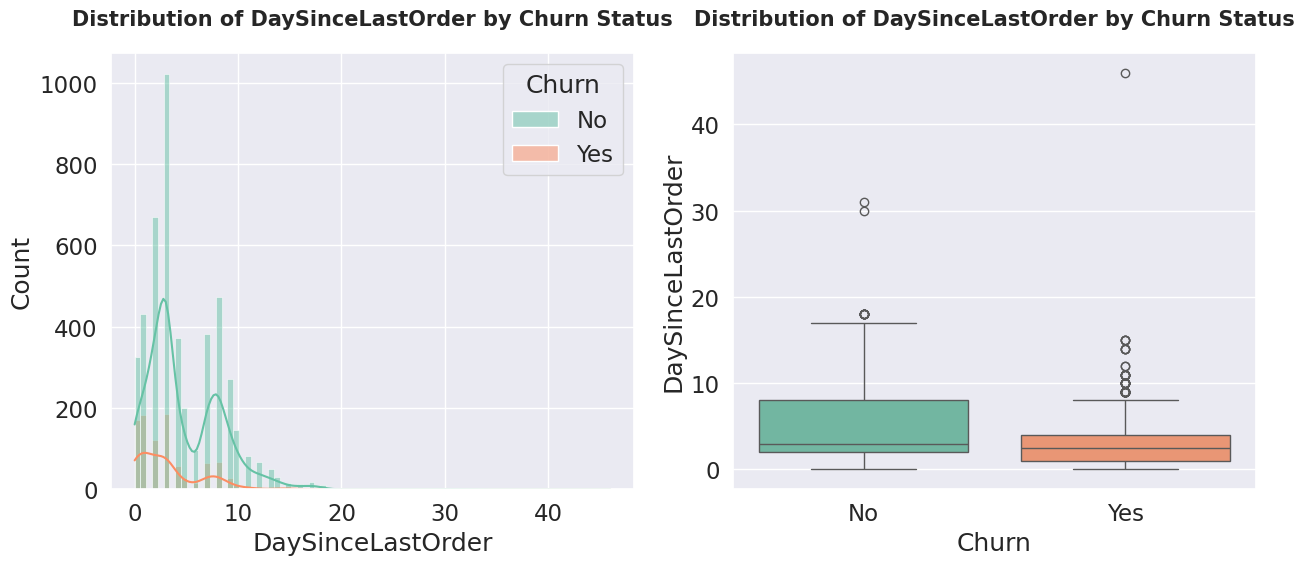

In [ ]:
continous_plot("DaySinceLastOrder")

Thời gian cuối cùng mà một người sử dụng nằm trong khoảng từ 5-10 ngày. Điều này cho thấy khách hàng không thường xuyên sử dụng. Xét mối quan hệ với Churn, ta có thể thấy không có sự khác biệt về thời gian này trong hai nhóm khách hàng rời bỏ và không rời bỏ

## **FEATURE ENGINEERING**

### **1. Creating New Feature From "OrderCount" Feature.**

In [30]:
conditions = [(df["OrderCount"]==1), (df["OrderCount"]==2), (df["OrderCount"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]
df["Total Products"] = np.select(conditions, values, default='Unknown') # Thêm giá trị mặc định 'Unknown'
#Từ cột "Num" để gộp thành 3 giá trị

In [31]:
df.drop(columns="OrderCount", inplace=True)

In [ ]:
df.head(10)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder,CashbackAmount,Total Products
0,Yes,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,5.0,160,One product
1,Yes,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,0.0,121,One product
2,Yes,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,3.0,120,One product
3,Yes,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,3.0,134,One product
4,Yes,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,3.0,130,One product
5,Yes,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,7.0,139,More Than 2 Products
6,Yes,9.0,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,0.0,121,One product
7,Yes,9.0,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,0.0,123,Two Products
8,Yes,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,2.0,127,One product
9,Yes,9.0,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,123,One product


### **2. Creating New Feature From "NumberOfAddress" Feature.**

In [32]:
conditions = [(df["NumberOfAddress"]==1), (df["NumberOfAddress"]==2), (df["NumberOfAddress"]==3), (df["NumberOfAddress"]>3)]
values =     ["One Adress","Two Adress","Three Adress", "More than 3 Adress"]
df["Total Adressess"] = np.select(conditions, values, default='Unknown') # Thêm giá trị mặc định 'Unknown'

In [33]:
df.drop(columns="NumberOfAddress", inplace=True)

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder,CashbackAmount,Total Products,Total Adressess
0,Yes,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,1,11.0,1.0,5.0,160,One product,More than 3 Adress
1,Yes,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,1,15.0,0.0,0.0,121,One product,More than 3 Adress
2,Yes,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,1,14.0,0.0,3.0,120,One product,More than 3 Adress
3,Yes,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0,23.0,0.0,3.0,134,One product,More than 3 Adress
4,Yes,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,0,11.0,1.0,3.0,130,One product,Three Adress


### **3. Creating New Feature From "CouponUsed" Feature.**

In [34]:
conditions = [(df["CouponUsed"]==1), (df["CouponUsed"]==2), (df["CouponUsed"]>2)]
values =     ["One CouponUsed","Two CouponUsed","More than Two CouponUsed"]
df["Total CouponUsed"] = np.select(conditions, values, default='Not Used')

In [35]:
df.drop(columns="CouponUsed", inplace=True)

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount,Total Products,Price Segment,Total CouponUsed
0,Yes,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,1,11.0,5.0,160,One product,More than 3 Adress,One CouponUsed
1,Yes,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,1,15.0,0.0,121,One product,More than 3 Adress,Not Used
2,Yes,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,1,14.0,3.0,120,One product,More than 3 Adress,Not Used
3,Yes,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0,23.0,3.0,134,One product,More than 3 Adress,Not Used
4,Yes,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,0,11.0,3.0,130,One product,Three Adress,One CouponUsed


## **DATA PREPROCESSING**

### **1. Tính toán các giá trị duy nhất của các cột phân loại.**

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'Complain', 'OrderAmountHikeFromlastYear',
       'DaySinceLastOrder', 'CashbackAmount', 'Total Products',
       'Total Adressess', 'Total CouponUsed'],
      dtype='object')

In [36]:
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus', 'Total Products',
       'Total Adressess', 'Total CouponUsed']

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")
    #gom nhóm

Unique Values in PreferredLoginDevice column is: ['Mobile Phone' 'Phone' 'Computer']
---------------------------------------------------------------------------------------------------- 

Unique Values in PreferredPaymentMode column is: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in PreferedOrderCat column is: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
---------------------------------------------------------------------------------------------------- 

Unique Values in MaritalStatus column is: ['Single' 'Divorced' 'Married']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total Prod

### **2. Thực hiện One Hot Encoding trên các đặc trưng phân loại.**

In [37]:
df = pd.get_dummies(columns=cat_cols, data=df) #Chuyển biến phân loại thành dạng số

### **3. Mã hóa biến mục tiêu**

In [38]:
df["Churn"].replace({"No":0,"Yes":1},inplace=True)

In [39]:
df.head(10)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,DaySinceLastOrder,...,Total Products_One product,Total Products_Two Products,Total Adressess_More than 3 Adress,Total Adressess_One Adress,Total Adressess_Three Adress,Total Adressess_Two Adress,Total CouponUsed_More than Two CouponUsed,Total CouponUsed_Not Used,Total CouponUsed_One CouponUsed,Total CouponUsed_Two CouponUsed
0,1,4.0,3,6.0,3.0,3,2,1,11.0,5.0,...,True,False,True,False,False,False,False,False,True,False
1,1,9.0,1,8.0,3.0,4,3,1,15.0,0.0,...,True,False,True,False,False,False,False,True,False,False
2,1,9.0,1,30.0,2.0,4,3,1,14.0,3.0,...,True,False,True,False,False,False,False,True,False,False
3,1,0.0,3,15.0,2.0,4,5,0,23.0,3.0,...,True,False,True,False,False,False,False,True,False,False
4,1,0.0,1,12.0,3.0,3,5,0,11.0,3.0,...,True,False,False,False,True,False,False,False,True,False
5,1,0.0,1,22.0,3.0,5,5,1,22.0,7.0,...,False,False,False,False,False,True,True,False,False,False
6,1,9.0,3,11.0,2.0,3,2,0,14.0,0.0,...,True,False,True,False,False,False,False,True,False,False
7,1,9.0,1,6.0,3.0,3,2,1,16.0,0.0,...,False,True,False,False,True,False,False,False,False,True
8,1,13.0,3,9.0,3.0,4,3,1,14.0,2.0,...,True,False,False,False,False,True,False,True,False,False
9,1,9.0,1,31.0,2.0,5,3,0,12.0,1.0,...,True,False,False,False,False,True,False,False,True,False


### **4. Kiểm tra độ lệch của các biến liên tục**

In [40]:
cols = ["Tenure","WarehouseToHome","OrderAmountHikeFromlastYear","DaySinceLastOrder"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})
#tính toán độ lệch của dữ liệu

,Feature Skewness
Tenure,0.773278
WarehouseToHome,1.678346
OrderAmountHikeFromlastYear,0.835439
DaySinceLastOrder,1.273530


Dựa trên bảng phân tích độ lệch (skewness) của các đặc tính, ta nhận thấy các giá trị như sau:

* Tenure: 0.773278
* WarehouseToHome: 1.678346
* OrderAmountHikeFromlastYear: 0.835439
* DaySinceLastOrder: 1.273530

Các giá trị lệch phải thường được xử lý bằng cách áp dụng các phép biến đổi như log để giảm độ lệch và đưa phân phối gần hơn với phân phối chuẩn, giúp cải thiện hiệu quả khi áp dụng các mô hình học máy. Theo nguyên tắc:

Những đặc tính có độ lệch lớn hơn 1 nên được xem xét áp dụng log transformation.
Những đặc tính có độ lệch nhỏ hơn 1 có thể được giữ nguyên hoặc thử nghiệm các phương pháp khác nếu cần.
Do đó, trong bảng trên, các đặc tính WarehouseToHome (1.678346) và DaySinceLastOrder (1.273530) nên được áp dụng biến đổi log để cải thiện sự phân phối dữ liệu. Các đặc tính Tenure và OrderAmountHikeFromlastYear có thể không cần xử lý log nhưng vẫn có thể thử nghiệm nếu cần kiểm tra thêm về tác động lên phân phối.

### **5. Thực hiện biến đổi LOG trên cột WarehouseToHome**

In [41]:
## Lưu trữ các giá trị Tenure trước đó để so sánh với các giá trị đã được biến đổi
old_WarehouseToHome = df["WarehouseToHome"]

In [42]:
df["WarehouseToHome"] = np.log(df["WarehouseToHome"])

In [43]:
# Tạo biểu đồ cho WarehouseToHome trước khi biến đổi
fig_before = go.Figure()

# Thêm histogram cho WarehouseToHome trước khi biến đổi
fig_before.add_trace(go.Histogram(
    x=old_WarehouseToHome,
    name='Before Transformation',
    marker_color='purple',
    opacity=0.75,
    histnorm='probability density',  # Thay đổi histogram thành mật độ xác suất
))

# Thêm đường KDE cho WarehouseToHome trước khi biến đổi
# Sử dụng KDE bằng cách thêm một trace cho đường KDE (KDE không phải là histogram)
fig_before.add_trace(go.Histogram(
    x=old_WarehouseToHome,
    name='KDE Before Transformation',
    marker_color='purple',
    opacity=0.3,
    histnorm='probability density',
))

# Tạo biểu đồ cho WarehouseToHome sau khi biến đổi
fig_after = go.Figure()

# Thêm histogram cho WarehouseToHome sau khi biến đổi
fig_after.add_trace(go.Histogram(
    x=df["WarehouseToHome"],
    name='After Transformation',
    marker_color='purple',
    opacity=0.75,
    histnorm='probability density',
))

# Thêm đường KDE cho WarehouseToHome sau khi biến đổi
fig_after.add_trace(go.Histogram(
    x=df["WarehouseToHome"],
    name='AGE After Transformation',
    marker_color='purple',
    opacity=0.3,
    histnorm='probability density',
))

# Cập nhật layout cho biểu đồ trước khi biến đổi
fig_before.update_layout(
    title='WarehouseToHome Distribution Before Transformation',
    xaxis_title='WarehouseToHome',
    yaxis_title='Density',
    barmode='overlay',
    font=dict(size=15, color='black'),
)

# Cập nhật layout cho biểu đồ sau khi biến đổi
fig_after.update_layout(
    title='WarehouseToHomeDistribution After Transformation',
    xaxis_title='WarehouseToHome',
    yaxis_title='Density',
    barmode='overlay',
    font=dict(size=15, color='black'),
)

# Hiển thị biểu đồ tuổi trước và sau khi biến đổi
fig_before.show()
fig_after.show()

### **6. Thực hiện biến đổi LOG trên cột DaySinceLastOrder**

In [44]:
old_DaySinceLastOrder = df["DaySinceLastOrder"]

In [45]:
df["DaySinceLastOrder"] = np.log1p(df["DaySinceLastOrder"])

In [46]:
import plotly.graph_objects as go
# Tạo biểu đồ chotrước khi biến đổi
fig_before = go.Figure()

# Thêm histogram chotrước khi biến đổi
fig_before.add_trace(go.Histogram(
    x=old_DaySinceLastOrder,
    name='Before Transformation',
    marker_color='purple',
    opacity=0.75,
    histnorm='probability density',  # Thay đổi histogram thành mật độ xác suất
))

# Thêm đường KDE cho  trước khi biến đổi
# Sử dụng KDE bằng cách thêm một trace cho đường KDE (KDE không phải là histogram)
fig_before.add_trace(go.Histogram(
    x=old_DaySinceLastOrder,
    name='KDE Before Transformation',
    marker_color='purple',
    opacity=0.3,
    histnorm='probability density',
))

# Tạo biểu đồ cho  sau khi biến đổi
fig_after = go.Figure()

# Thêm histogram cho sau khi biến đổi
fig_after.add_trace(go.Histogram(
    x=df["DaySinceLastOrder"],
    name='After Transformation',
    marker_color='purple',
    opacity=0.75,
    histnorm='probability density',
))

# Thêm đường KDE cho sau khi biến đổi
fig_after.add_trace(go.Histogram(
    x=df["DaySinceLastOrder"],
    name='AGE After Transformation',
    marker_color='purple',
    opacity=0.3,
    histnorm='probability density',
))

# Cập nhật layout cho biểu đồ trước khi biến đổi
fig_before.update_layout(
    title='DaySinceLastOrder Distribution Before Transformation',
    xaxis_title='DaySinceLastOrder',
    yaxis_title='Density',
    barmode='overlay',
    font=dict(size=15, color='black'),
)

# Cập nhật layout cho biểu đồ sau khi biến đổi
fig_after.update_layout(
    title='DaySinceLastOrder Distribution After Transformation',
    xaxis_title='DaySinceLastOrder',
    yaxis_title='Density',
    barmode='overlay',
    font=dict(size=15, color='black'),
)

# Hiển thị biểu đồ tuổi trước và sau khi biến đổi
fig_before.show()
fig_after.show()

### **7. Phân tách các đặc trưng và nhãn cho việc huấn luyện mô hình.**

In [47]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

### **8. Chia dữ liệu cho việc huấn luyện và kiểm tra mô hình.**

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

-> ở đây tỉ lệ dữ liệu được chia là 7/3

In [49]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (3941, 42)
Shape of x_test is:  (1689, 42)
Shape of y_train is: (3941,)
Shape of y_test is:  (1689,)


### **9. Áp dụng SMOTE để khắc phục sự mất cân bằng lớp trong biến mục tiêu.**

In [50]:
smt = SMOTE(random_state=42)

In [51]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [52]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(6534, 42) (6534,)


In [53]:
y_train_resampled.value_counts().to_frame()

,count
Churn,
0,3267
1,3267


-> Cả hai loại trong biến mục tiêu hiện đang có số lượng bản ghi bằng nhau. Vì vậy, chúng ta có thể huấn luyện mô hình trên các bản ghi cân bằng cho cả hai loại rời bỏ và tạo ra một mô hình dự đoán với độ thiên lệch thấp.

## TẠO MÔ HÌNH DECISIONTREE

### **1. Thực hiện Grid-Search để tìm tham số thích hợp**

In [66]:
dtree = DecisionTreeClassifier()

In [67]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [68]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

### **2. Lấy các tham số thích hợp nhất**

In [69]:
best_parameters = grid_search.best_params_

print("Các tham số tốt nhất cho mô hình Decision Tree là:\n\n")
best_parameters

Các tham số tốt nhất cho mô hình Decision Tree là:




{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

### **3. Tạo mô hình DecisionTree với các tham số tốt nhất**

In [70]:
dtree = DecisionTreeClassifier(**best_parameters)
dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=10, random_state=42)

### **4. Tính toán độ chính xác của mô hình**

In [71]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Điểm chính xác của mô hình trên dữ liệu huấn luyện là =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Điểm chính xác của mô hình trên dữ liệu thử nghiệm =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Điểm chính xác của mô hình trên dữ liệu huấn luyện là => 96.37 %
Điểm chính xác của mô hình trên dữ liệu thử nghiệm => 89.82 %


###  **5. Đánh giá mô hình bằng cách sử dụng các giá trị chỉ số khác nhau.**

In [72]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Điểm thu hồi của mô hình là =>",recall_score(y_test,y_test_pred,average="micro"))
print("Điểm chính xác của mô hình là =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8981645944345766
Điểm thu hồi của mô hình là => 0.8981645944345766
Điểm chính xác của mô hình là => 0.8981645944345766


### **6. Tìm hiểu tầm quan trọng của các đặc trưng trong Decision Tree Classifier.**

In [73]:
import plotly.express as px

imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
features = imp_df.sort_values(by="Importance", ascending=False)

fig = px.bar(
    features,
    x="Importance",
    y="Feature Name",
    orientation='h',  # Biểu đồ nằm ngang
    color='Importance', # Tô màu theo mức độ quan trọng
    color_continuous_scale='Plasma', # Sử dụng bảng màu Plasma
    title="Feature Importance in the Model Prediction"
)
fig.update_layout(
    title_font=dict(size=20, color="black", family="Arial"),
    yaxis_title=None, # Ẩn tiêu đề trục y
    xaxis_title="Importance",
    height=600
)
fig.show()

Biểu đồ thể hiện rõ ràng tầm quan trọng của các đặc trưng trong mô hình Decision Tree Classifier.

**Nhóm đặc trưng quan trọng nhất:**

* **"Tenure"**:  Đặc trưng quan trọng nhất, cho thấy thời gian khách hàng sử dụng có ảnh hưởng lớn đến quyết định rời bỏ dịch vụ.
* **"CashbackAmount"**: Số tiền được hoàn cũng là yếu tố quan trọng.
* **"MaritalStatus_Disvorced"**:  Việc khách hàng đang ở trong tình trạng đã ly hôn cũng góp phần lớn trong việc dự đoán tỉ lệ rời bỏ.

**Nhóm đặc trưng ít quan trọng:**

*  Các đặc trưng còn lại, bao gồm thông tin về phân loại hàng, phương thức thanh toán, thiết bị sử dụng... có mức độ quan trọng thấp hơn đáng kể. Điều này cho thấy mô hình Decision Tree tập trung chủ yếu vào số năm gắn bó cũng như số tiền hoàn trả của khách hàng để đưa ra dự đoán.

**Kết luận:**

* Nắm bắt được các đặc trưng quan trọng giúp bạn hiểu rõ hơn về mô hình và yếu tố nào ảnh hưởng đến quyết định rời bỏ dịch vụ của khách hàng.
*  Từ đó, bạn có thể đưa ra các chiến lược kinh doanh phù hợp, tập trung vào nhóm khách hàng có rủi ro cao (ví dụ: Người gắn bó lâu năm và chỉ có ít tiền hoàn trả) để cải thiện khả năng giữ chân khách hàng.



### **7. Đánh giá mô hình bằng cách sử dụng Confusion Matrix.**

In [76]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

# Tạo Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Định nghĩa dải màu tùy chỉnh
colorscale = [
    [0, 'rgb(255, 0, 0)'],
    [(400 - 200) / 1200, 'rgb(30, 144, 255)'],
    [(600 - 200) / 1200, 'rgb(50, 205, 50)'],
    [(800 - 200) / 1200, 'rgb(148, 0, 211)'],
    [(1000 - 200) / 1200, 'rgb(255, 165, 0)'],
    [(1200 - 200) / 1200, 'rgb(255, 182, 193)'],
    [1, 'rgb(128, 128, 128)']
]

# Vẽ Confusion Matrix với Plotly và dải màu tùy chỉnh
fig = ff.create_annotated_heatmap(
    z=cm,
    x=["Predicted: 0", "Predicted: 1"],
    y=["Actual: 0", "Actual: 1"],
    annotation_text=cm,
    colorscale=colorscale
)

# Tùy chỉnh giao diện
fig.update_layout(
    title_text="Model Evaluation using Confusion Matrix",
    title_font=dict(size=20, color="black", family="Arial"),
    xaxis_title="Predicted Labels",
    yaxis_title="Actual Labels",
)

# Thêm dải màu bên cạnh biểu đồ
fig.update_traces(colorbar=dict(
    title="Count",  # Tiêu đề của dải màu
    tickvals=[200, 400, 600, 800, 1000, 1200, 1400], # Vị trí các mốc giá trị
    ticktext=["200", "400", "600", "800", "1000", "1200", "1400"], #  Nhãn cho các mốc giá trị
    lenmode="pixels",  #  Đặt chiều dài dải màu theo pixels
    len=300  #  Chiều dài dải màu (pixels)
))

fig.show()

**Nhận xét:**

* Mô hình có xu hướng **dự đoán lớp 0 tốt hơn lớp 1**, thể hiện qua số lượng TN (1342) cao hơn TP (73).
* Tỷ lệ FP (99) so với TP (73) cho thấy mô hình **còn nhầm lẫn** trong việc phân loại lớp 1.
* Cần xem xét thêm các chỉ số khác như **Precision, Recall, F1-score** để đánh giá toàn diện hiệu suất của mô hình.
* **Strong True Positive Rate:**  Mặc dù TP thấp hơn TN, nhưng số lượng TP vẫn khá cao, cho thấy mô hình có khả năng xác định chính xác các trường hợp dương tính. Điều này cho thấy mô hình hiệu quả trong việc phân loại chính xác kết quả mong muốn.
* **Need of Improvement in False Negative Rate:** Sự hiện diện của một số lượng FN tương đối cao (175) cho thấy mô hình có thể đã bỏ sót việc xác định một số trường hợp dương tính thực tế. Điều này cho thấy cần phải tinh chỉnh thêm để nâng cao khả năng của mô hình trong việc nắm bắt tất cả các trường hợp dương tính.

### **8. Đánh giá mô hình: Đường cong ROC và Diện tích dưới đường cong (AUC).**


In [75]:
# Tạo y_pred_proba và df_actual_predicted tương tự như bạn đã có
y_pred_proba = dtree.predict_proba(x_test)[:, 1]  # Sửa lại phần này để lấy đúng mảng xác suất
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index

# Tính toán FPR, TPR và AUC
fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

# Vẽ ROC Curve với plotly
fig = go.Figure()

# Thêm đường cong ROC
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'AUC = {auc:.2f}', line=dict(color='green')))

# Thêm đường chéo (y = x)
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='black', dash='dash'), showlegend=False))

# Định dạng biểu đồ
fig.update_layout(
    title="ROC Curve",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    width=800,
    height=600,
    title_font=dict(size=20, color='black', family="Arial Black"),
)

# Hiển thị biểu đồ
fig.show()

Giá trị AUC (Diện tích dưới đường cong) là 0.86 cho thấy mô hình có sức phân biệt mạnh mẽ. Điều này cho thấy mô hình có khả năng cao trong việc phân biệt giữa các trường hợp dương tính và âm tính, chỉ ra hiệu quả của nó trong việc đưa ra các dự đoán chính xác. Mô hình có xác suất tương đối cao trong việc xếp hạng một trường hợp dương tính được chọn ngẫu nhiên cao hơn một trường hợp âm tính được chọn ngẫu nhiên.

## **TỔNG KẾT DỰ ÁN**

* Dự án này tập trung vào việc giải quyết bài toán dự đoán tỷ lệ khách hàng rời bỏ (Churn) trong một nền tảng thương mại điện tử. Mục tiêu chính là xác định các yếu tố quan trọng ảnh hưởng đến việc khách hàng quyết định rời bỏ, từ đó đưa ra các chiến lược marketing và chăm sóc khách hàng hiệu quả hơn.

* Qua quá trình phân tích dữ liệu và huấn luyện mô hình Machine Learning, tôi đã xác định được một số yếu tố quan trọng như Tenure, Complaint và CashbackAmount có mối tương quan rõ rệt với tỷ lệ churn. Các bước tiền xử lý bao gồm việc xử lý giá trị thiếu, chuẩn hóa dữ liệu, và áp dụng SMOTE để giảm thiểu sự mất cân bằng lớp.

* Sau khi huấn luyện các mô hình phân loại, mô hình có hiệu suất tốt nhất đạt được AUC = 0.86, cho thấy khả năng dự đoán chính xác nhóm khách hàng có nguy cơ rời bỏ. Các chỉ số đánh giá mô hình, như độ chính xác, độ nhạy, và F1-score, đều cho thấy mô hình hoạt động tốt.

* Tuy nhiên, dự án còn một số hạn chế, bao gồm việc sử dụng dữ liệu không thực tế và kích thước mẫu còn nhỏ, điều này có thể ảnh hưởng đến tính tổng quát của kết quả. Do đó, hướng nghiên cứu trong tương lai cần bổ sung dữ liệu thực tế và mở rộng kích thước mẫu để cải thiện độ chính xác và tính ứng dụng của mô hình.